<a href="https://colab.research.google.com/github/Parimala-15/AI-powered-Data-Insights/blob/main/Week1_2_3__Churn_Analysis_Predicting_Student_Drop_Offs_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 4 – Churn Analysis of Students Drop-off**

### ***AI-Powered Data Insights | Virtual Internship - 1404***

#### *Notebook Prepared by: AI Team 5 · RIT 1404*




---



# **Data Cleaning and Validation**

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd
# file_path = '/content/drive/MyDrive/Excelerate Internship/AI insights/SLU Opportunity Wise Data-1710158595043 - SLU Opportunity Wise Data-1710158595043.csv'
file_path = '/content/SLU Opportunity Wise Data-1710158595043 - SLU Opportunity Wise Data-1710158595043.csv'
df = pd.read_csv(file_path)
df.head()


Learner SignUp DateTime                  Opportunity Id  \
0     06/14/2023 12:30:35  00000000-0GN2-A0AY-7XK8-C5FZPP   
1     05/01/2023 05:29:16  00000000-0GN2-A0AY-7XK8-C5FZPP   
2     04/09/2023 20:35:08  00000000-0GN2-A0AY-7XK8-C5FZPP   
3     08/29/2023 05:20:03  00000000-0GN2-A0AY-7XK8-C5FZPP   
4     01/06/2023 15:26:36  00000000-0GN2-A0AY-7XK8-C5FZPP   

                                    Opportunity Name Opportunity Category  \
0  Career Essentials: Getting Started with Your P...               Course   
1  Career Essentials: Getting Started with Your P...               Course   
2  Career Essentials: Getting Started with Your P...               Course   
3  Career Essentials: Getting Started with Your P...               Course   
4  Career Essentials: Getting Started with Your P...               Course   

  Opportunity End Date        First Name Date of Birth  Gender        Country  \
0  06/29/2024 18:52:39             Faria    01/12/2001  Female       Pakistan   
1  06/29/2024 18:52:39          Poojitha    08/16/2000  Female          India   
2  06/29/2024 18:52:39          Emmanuel    01/27/2002    Male  United States   
3  06/29/2024 18:52:39  Amrutha Varshini    11/01/1999  Female  United States   
4  06/29/2024 18:52:39    Vinay Varshith    04/19/2000    Male  United States   

                   Institution Name Current/Intended Major  \
0                             Nwihs              Radiology   
1                       SAINT LOUIS    Information Systems   
2  Illinois Institute of Technology       Computer Science   
3            Saint Louis University    Information Systems   
4            Saint Louis University       Computer Science   

      Entry created at Status Description  Status Code  \
0  03/11/2024 12:01:41            Started         1080   
1  03/11/2024 12:01:41            Started         1080   
2  03/11/2024 12:01:41            Started         1080   
3  03/11/2024 12:01:41     Team Allocated         1070   
4  03/11/2024 12:01:41            Started         1080   

                 Apply Date Opportunity Start Date  
0       06/14/2023 12:36:09    11/03/2022 18:30:39  
1       05/01/2023 06:08:21    11/03/2022 18:30:39  
2  05/11/2023 1085640:21:29    11/03/2022 18:30:39  
3       10/09/2023 22:02:42    11/03/2022 18:30:39  
4       01/06/2023 15:40:10    11/03/2022 18:30:39

In [ ]:
print(df.columns)      # List all column names
print(df.index)      #
print(df.dtypes)         # Data types of each column
print(df.shape)          # Dimensions of the DataFrame (rows, columns)
print(df.info())       # Overview of columns, non-null counts, and data types
df.describe()   # Summary statistics for numerical columns
df.nunique()      # Unique values per column

Index(['Learner SignUp DateTime', 'Opportunity Id', 'Opportunity Name',
       'Opportunity Category', 'Opportunity End Date', 'First Name',
       'Date of Birth', 'Gender', 'Country', 'Institution Name',
       'Current/Intended Major', 'Entry created at', 'Status Description',
       'Status Code', 'Apply Date', 'Opportunity Start Date'],
      dtype='object')
RangeIndex(start=0, stop=8558, step=1)
Learner SignUp DateTime    object
Opportunity Id             object
Opportunity Name           object
Opportunity Category       object
Opportunity End Date       object
First Name                 object
Date of Birth              object
Gender                     object
Country                    object
Institution Name           object
Current/Intended Major     object
Entry created at           object
Status Description         object
Status Code                 int64
Apply Date                 object
Opportunity Start Date     object
dtype: object
(8558, 16)
<class 'pandas.core.frame.

Learner SignUp DateTime    3916
Opportunity Id               23
Opportunity Name             22
Opportunity Category          5
Opportunity End Date         17
First Name                 3026
Date of Birth              2620
Gender                        4
Country                      71
Institution Name           2089
Current/Intended Major      406
Entry created at             94
Status Description            8
Status Code                   8
Apply Date                 8548
Opportunity Start Date       18
dtype: int64

## Handling Missing Values

In [ ]:
print(df.isnull().sum())

Learner SignUp DateTime       0
Opportunity Id                0
Opportunity Name              0
Opportunity Category          0
Opportunity End Date          0
First Name                    0
Date of Birth                 0
Gender                        0
Country                       0
Institution Name              5
Current/Intended Major        5
Entry created at              0
Status Description            0
Status Code                   0
Apply Date                    0
Opportunity Start Date     3794
dtype: int64


In [ ]:
# Handling optional fields with missing values (e.g., Institution, Major)
df['Institution Name'] = df['Institution Name'].fillna('Unknown')
df['Current/Intended Major'] = df['Current/Intended Major'].fillna('Undeclared')


# Filling missing Opportunity Start Dates using Apply Date (as fallback)
df['Opportunity Start Date'] = df['Opportunity Start Date'].fillna(df['Apply Date'])

## Removing Duplicate Rows

In [ ]:
print("Duplicate Rows:", df.duplicated().sum())
df = df.drop_duplicates()

Duplicate Rows: 0


## Standardizing Text Formatting

In [ ]:
# Sripping whitespace from object (string) columns
df_obj = df.select_dtypes(include='object')
df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

# Standardizing
df['Gender'] = df['Gender'].str.title()
df['First Name'] = df['First Name'].str.strip().str.title()
df['Gender'] = df['Gender'].str.strip().str.capitalize()
df['Country'] = df['Country'].str.strip().str.title()
df['Institution Name'] = df['Institution Name'].str.strip().str.title()
df['Current/Intended Major'] = df['Current/Intended Major'].str.strip().str.title()

## Date Consistency and Correctness Check

- Handling date issue: corrupted  formats like 05/11/2023 1085640:21:29 in Apply Date.
- And start date > end date.

Rows 5605–5866, where Opportunity Name = 'Event', have:

- Opportunity Start Date = 02/17/2024 14:00:00

- Opportunity End Date = 02/17/2024 11:30:00

This is invalid: end time is earlier than start time on the same day.

In rows 5000–5678, just replace 11:30:00 with 22:30:00 in Opportunity End Date

In [ ]:
# Filter rows where Opportunity End Date is earlier than Start Date
mask_wrong_time = (
    (df['Opportunity End Date'] < df['Opportunity Start Date']) &
    (df['Opportunity Name'] == 'Event') &
    (df.index >= 5000) & (df.index <= 5678)
)

# Fix by replacing the time in 'Opportunity End Date' to 22:30
df.loc[mask_wrong_time, 'Opportunity End Date'] = df.loc[mask_wrong_time, 'Opportunity End Date'].apply(
    lambda x: x.replace(hour=22, minute=30)
)

In [ ]:
# keeping only the date
df['Date of Birth'] = pd.to_datetime(df['Date of Birth']).dt.normalize()

# Handling Formats
date_cols = [
    'Learner SignUp DateTime',
    'Opportunity End Date',
    'Entry created at',
    'Apply Date',
    'Opportunity Start Date'
]

# Show invalid formats
for col in date_cols:
    print(f"\n📅 Checking column: {col}")

    # Preview unique raw values (first 10)
    raw_values = df[col].dropna().astype(str).unique()
    print("Unique sample values (up to 10):", raw_values[:10])

    # Identify rows that likely won't parse (e.g., long number strings, malformed times)
    bad_values = df[col].astype(str).str.contains(r'^\d{5,}$|[^0-9:/\-\s]', na=False)
    if bad_values.any():
        print("❌ Potential bad formats:")
        print(df.loc[bad_values, col].unique())

    # Try parsing with errors coerced (invalid formats become NaT)
    df[col] = pd.to_datetime(df[col], errors='coerce')

    # Count missing after parsing
    num_missing = df[col].isna().sum()
    print(f"⛔ Could not parse: {num_missing} rows")

print("\n✅ Cleaned date columns. Final missing values:")
print(df[date_cols].isna().sum())


📅 Checking column: Learner SignUp DateTime
Unique sample values (up to 10): ['06/14/2023 12:30:35' '05/01/2023 05:29:16' '04/09/2023 20:35:08'
 '08/29/2023 05:20:03' '01/06/2023 15:26:36' '03/02/2024 19:16:07'
 '05/31/2023 07:11:04' '07/22/2023 07:30:25' '03/20/2023 16:36:30'
 '05/11/2023 03:40:33']
⛔ Could not parse: 295 rows

📅 Checking column: Opportunity End Date
Unique sample values (up to 10): ['06/29/2024 18:52:39' '03/01/2023 11:36:46' '03/11/2024 18:00:00'
 '04/12/2024 1095120:00:00' '06/30/2024 16:18:50' '04/23/2024 16:36:47'
 '12/05/2025 11:06:00' '12/05/2025 12:59:00' '12/06/2025 10:26:00'
 '02/17/2024 11:30:00']
⛔ Could not parse: 1262 rows

📅 Checking column: Entry created at
Unique sample values (up to 10): ['03/11/2024 12:01:41' '03/11/2024 12:01:42' '03/11/2024 12:01:43'
 '03/11/2024 12:01:44' '03/11/2024 12:01:45' '03/11/2024 12:01:46'
 '03/11/2024 12:01:47' '03/11/2024 12:01:48' '03/11/2024 12:01:49'
 '03/11/2024 12:01:50']
⛔ Could not parse: 0 rows

📅 Checking colu

In [ ]:
# Removing rows with invalid date formats
df = df.dropna(subset=['Apply Date', 'Opportunity Start Date','Opportunity End Date', 'Learner SignUp DateTime'])

In [ ]:
# Handling date data inconsistency
          # Apply Date  →  Opportunity Start Date  →  Opportunity End Date
# Check 1: Apply Date should be before Start Date
wrong_apply_vs_start = df[df['Apply Date'] >= df['Opportunity Start Date']]

# Check 2: Start Date should be before End Date
wrong_start_vs_end = df[df['Opportunity Start Date'] > df['Opportunity End Date']]

# Check 3: Apply Date should be before End Date
wrong_apply_vs_end = df[df['Apply Date'] > df['Opportunity End Date']]

# Print how many wrong
print("Wrong Apply Date > Start Date:", len(wrong_apply_vs_start))
print("Wrong Start Date > End Date:", len(wrong_start_vs_end))
print("Wrong Apply Date > End Date:", len(wrong_apply_vs_end))

Wrong Apply Date > Start Date: 4858
Wrong Start Date > End Date: 490
Wrong Apply Date > End Date: 0


In [ ]:
# 1. Fix Apply Date > Start Date
df.loc[df['Apply Date'] > df['Opportunity Start Date'], 'Opportunity Start Date'] = df['Apply Date']

# 2. Drop Start Date > End Date (critical logic error)
df = df[df['Opportunity Start Date'] <= df['Opportunity End Date']]

# 3. Drop Apply Date > End Date
df = df[df['Apply Date'] <= df['Opportunity End Date']]

## Validating Data

In [ ]:
# Reset index after cleaning
df = df.reset_index(drop=True)

In [ ]:
# Data Validation Checks
print("Missing values after cleaning:\n", df.isnull().sum())
print("Updated Data Types:\n", df.dtypes)
# print(df.head())

Missing values after cleaning:
 Learner SignUp DateTime    0
Opportunity Id             0
Opportunity Name           0
Opportunity Category       0
Opportunity End Date       0
First Name                 0
Date of Birth              0
Gender                     0
Country                    0
Institution Name           0
Current/Intended Major     0
Entry created at           0
Status Description         0
Status Code                0
Apply Date                 0
Opportunity Start Date     0
dtype: int64
Updated Data Types:
 Learner SignUp DateTime    datetime64[ns]
Opportunity Id                     object
Opportunity Name                   object
Opportunity Category               object
Opportunity End Date       datetime64[ns]
First Name                         object
Date of Birth              datetime64[ns]
Gender                             object
Country                            object
Institution Name                   object
Current/Intended Major             object
Entry cr



---



# **Feature Engineering**

## 1️⃣ Creating New Features


In [ ]:
# ➤ Age Calculation (of learner)

from datetime import datetime

today = datetime.today()
today
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'])
# df['Age'] = today.year-df['Date of Birth'].dt.year
df['Age'] = today.year - df['Date of Birth'].dt.year - ((today.month < df['Date of Birth'].dt.month) |
    ((today.month == df['Date of Birth'].dt.month) & (today.day < df['Date of Birth'].dt.day))
)

print(df[['Date of Birth', 'Age']].head())

  Date of Birth  Age
0    2001-01-12   24
1    2000-08-16   24
2    1999-11-01   25
3    2000-04-19   25
4    1996-05-12   28


In [ ]:
# ➤ Opportunity Duration/'Time Remaining (Days) (difference in days between application and start date)

df['Opportunity Start Date'] = pd.to_datetime(df['Opportunity Start Date'])
df['Opportunity End Date'] = pd.to_datetime(df['Opportunity End Date'])
df['Opportunity Duration'] = (df['Opportunity End Date'] - df['Opportunity Start Date']).dt.days   # Duration in days


## 2️⃣ Transforming Existing Features


In [ ]:
# ➤ Normalization

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler = MinMaxScaler()
df[['Normalized Age', 'Normalized Opportunity Duration']] = scaler.fit_transform(df[['Age', 'Opportunity Duration']])
df.head(3)

Learner SignUp DateTime                  Opportunity Id  \
0     2023-06-14 12:30:35  00000000-0GN2-A0AY-7XK8-C5FZPP   
1     2023-05-01 05:29:16  00000000-0GN2-A0AY-7XK8-C5FZPP   
2     2023-08-29 05:20:03  00000000-0GN2-A0AY-7XK8-C5FZPP   

                                    Opportunity Name Opportunity Category  \
0  Career Essentials: Getting Started with Your P...               Course   
1  Career Essentials: Getting Started with Your P...               Course   
2  Career Essentials: Getting Started with Your P...               Course   

  Opportunity End Date        First Name Date of Birth  Gender        Country  \
0  2024-06-29 18:52:39             Faria    2001-01-12  Female       Pakistan   
1  2024-06-29 18:52:39          Poojitha    2000-08-16  Female          India   
2  2024-06-29 18:52:39  Amrutha Varshini    1999-11-01  Female  United States   

         Institution Name Current/Intended Major    Entry created at  \
0                   Nwihs              Radiology 2024-03-11 12:01:41   
1             Saint Louis    Information Systems 2024-03-11 12:01:41   
2  Saint Louis University    Information Systems 2024-03-11 12:01:41   

  Status Description  Status Code          Apply Date Opportunity Start Date  \
0            Started         1080 2023-06-14 12:36:09    2023-06-14 12:36:09   
1            Started         1080 2023-05-01 06:08:21    2023-05-01 06:08:21   
2     Team Allocated         1070 2023-10-09 22:02:42    2023-10-09 22:02:42   

   Age  Opportunity Duration  Normalized Age  Normalized Opportunity Duration  
0   24                   381        0.352941                         0.420994  
1   24                   425        0.352941                         0.469613  
2   25                   263        0.372549                         0.290608

In [ ]:
# ➤ Encoding Categorical Data

df = pd.get_dummies(df, columns=['Gender', 'Opportunity Category'], drop_first=True,dtype=int )  # not including 'Country'
df.head(3)

Learner SignUp DateTime                  Opportunity Id  \
0     2023-06-14 12:30:35  00000000-0GN2-A0AY-7XK8-C5FZPP   
1     2023-05-01 05:29:16  00000000-0GN2-A0AY-7XK8-C5FZPP   
2     2023-08-29 05:20:03  00000000-0GN2-A0AY-7XK8-C5FZPP   

                                    Opportunity Name Opportunity End Date  \
0  Career Essentials: Getting Started with Your P...  2024-06-29 18:52:39   
1  Career Essentials: Getting Started with Your P...  2024-06-29 18:52:39   
2  Career Essentials: Getting Started with Your P...  2024-06-29 18:52:39   

         First Name Date of Birth        Country        Institution Name  \
0             Faria    2001-01-12       Pakistan                   Nwihs   
1          Poojitha    2000-08-16          India             Saint Louis   
2  Amrutha Varshini    1999-11-01  United States  Saint Louis University   

  Current/Intended Major    Entry created at  ... Opportunity Duration  \
0              Radiology 2024-03-11 12:01:41  ...                  381   
1    Information Systems 2024-03-11 12:01:41  ...                  425   
2    Information Systems 2024-03-11 12:01:41  ...                  263   

   Normalized Age Normalized Opportunity Duration Gender_Female  Gender_Male  \
0        0.352941                        0.420994             1            0   
1        0.352941                        0.469613             1            0   
2        0.372549                        0.290608             1            0   

   Gender_Other  Opportunity Category_Course  Opportunity Category_Engagement  \
0             0                            1                                0   
1             0                            1                                0   
2             0                            1                                0   

   Opportunity Category_Event  Opportunity Category_Internship  
0                           0                                0  
1                           0                                0  
2                           0                                0  

[3 rows x 25 columns]

## 3️⃣ Extracting Useful Components


In [ ]:
# ➤ Date-Based Features (from Sign-Up Date)
df['Learner SignUp DateTime'] = pd.to_datetime(df['Learner SignUp DateTime'])
df['SignUp Month'] = df['Learner SignUp DateTime'].dt.month
df['SignUp Year'] = df['Learner SignUp DateTime'].dt.year
df['SignUp Weekday'] = df['Learner SignUp DateTime'].dt.day_name()
print(df[['Learner SignUp DateTime', 'SignUp Month', 'SignUp Year', 'SignUp Weekday']].head())

# ➤ Opportunity Engagement (Apply Delay)
df['Apply Date'] = pd.to_datetime(df['Apply Date'])
df['Engagement Lag'] = (df['Opportunity Start Date'] - df['Apply Date']).dt.days  # delay between Apply and Start date which is Time in Opportunity
df.head(3)

  Learner SignUp DateTime  SignUp Month  SignUp Year SignUp Weekday
0     2023-06-14 12:30:35             6         2023      Wednesday
1     2023-05-01 05:29:16             5         2023         Monday
2     2023-08-29 05:20:03             8         2023        Tuesday
3     2023-01-06 15:26:36             1         2023         Friday
4     2024-03-02 19:16:07             3         2024       Saturday


Learner SignUp DateTime                  Opportunity Id  \
0     2023-06-14 12:30:35  00000000-0GN2-A0AY-7XK8-C5FZPP   
1     2023-05-01 05:29:16  00000000-0GN2-A0AY-7XK8-C5FZPP   
2     2023-08-29 05:20:03  00000000-0GN2-A0AY-7XK8-C5FZPP   

                                    Opportunity Name Opportunity End Date  \
0  Career Essentials: Getting Started with Your P...  2024-06-29 18:52:39   
1  Career Essentials: Getting Started with Your P...  2024-06-29 18:52:39   
2  Career Essentials: Getting Started with Your P...  2024-06-29 18:52:39   

         First Name Date of Birth        Country        Institution Name  \
0             Faria    2001-01-12       Pakistan                   Nwihs   
1          Poojitha    2000-08-16          India             Saint Louis   
2  Amrutha Varshini    1999-11-01  United States  Saint Louis University   

  Current/Intended Major    Entry created at  ... Gender_Male  Gender_Other  \
0              Radiology 2024-03-11 12:01:41  ...           0             0   
1    Information Systems 2024-03-11 12:01:41  ...           0             0   
2    Information Systems 2024-03-11 12:01:41  ...           0             0   

  Opportunity Category_Course Opportunity Category_Engagement  \
0                           1                               0   
1                           1                               0   
2                           1                               0   

   Opportunity Category_Event  Opportunity Category_Internship  SignUp Month  \
0                           0                                0             6   
1                           0                                0             5   
2                           0                                0             8   

   SignUp Year  SignUp Weekday  Engagement Lag  
0         2023       Wednesday               0  
1         2023          Monday               0  
2         2023         Tuesday               0  

[3 rows x 29 columns]

In [ ]:
# ➤ Calculate age based on 'Date of Birth' and 'Opportunity Start Date'
df['Age_at_Opportunity_Start'] = (df['Opportunity Start Date'] - df['Date of Birth']).dt.days // 365

# ➤ Create a feature indicating whether the application was submitted before or after the opportunity started.
df['Application_Timing'] = (df['Apply Date'] < df['Opportunity Start Date']).astype(int)  #1 if applied before start date, 0 otherwise.


# ➤ Grouping related majors).
def categorize_major(major):
    if major in ('Computer Science', 'Software Engineering','Data Science'):
        return 'Computer Science / IT'
    elif major in ('Business Administration', 'Finance', 'Economics'):
        return 'Business'
    else:
        return 'Other'
df['Major_Category'] = df['Current/Intended Major'].apply(categorize_major)

# Verify
print(df[['Current/Intended Major', 'Major_Category']].head())

   Current/Intended Major         Major_Category
0               Radiology                  Other
1     Information Systems                  Other
2     Information Systems                  Other
3        Computer Science  Computer Science / IT
4  Mechanical Engineering                  Other


## 4️⃣ Combining Features


In [ ]:
# ➤ Interaction Feature: Age × Engagement Lag

df['Age_EngagementLag_Interaction'] = df['Age'] * df['Engagement Lag']
display(df[['Age', 'Engagement Lag', 'Age_EngagementLag_Interaction']].head())


# ➤ Engagement Score (Composite Feature)

# df['Opportunity Duration'] = df['Opportunity Duration'].dt.total_seconds() / 86400  # seconds to days
df['Engagement Score'] = (
    0.3 * df['Age'] +
    0.4 * df['Opportunity Duration'])    # Selecting the first column of the scaled data to maintain 1D shape

display(df[['Opportunity Duration', 'Age', 'Engagement Score']].head())

Age  Engagement Lag  Age_EngagementLag_Interaction
0   24               0                              0
1   24               0                              0
2   25               0                              0
3   25               0                              0
4   28               0                              0

Opportunity Duration  Age  Engagement Score
0                   381   24             159.6
1                   425   24             177.2
2                   263   25             112.7
3                   540   25             223.5
4                   118   28              55.6

## 5️⃣ Temporal Analysis


In [ ]:
# ➤ Seasonal trends  (Already added in Step 3 → SignUp Month and SignUp Weekday)

monthly_counts = df.groupby('SignUp Month').size()
weekday_counts = df.groupby('SignUp Weekday').size()
print("Monthly Counts:\n", monthly_counts)
print("\nWeekday Counts:\n", weekday_counts)
seasonal_trends = df.groupby('SignUp Month')['Engagement Score'].mean()
print("\nSeasonal Trends:\n", seasonal_trends)

Monthly Counts:
 SignUp Month
1     1094
2      800
3      238
4      184
5      317
6      593
7      485
8      750
9      457
10     264
11     127
12     360
dtype: int64

Weekday Counts:
 SignUp Weekday
Friday        916
Monday        724
Saturday      674
Sunday        606
Thursday     1122
Tuesday       882
Wednesday     745
dtype: int64

Seasonal Trends:
 SignUp Month
1      56.975686
2      57.416000
3     120.671849
4     125.575000
5     131.142902
6     127.560540
7      92.055464
8      77.842667
9      69.953611
10     66.970833
11     53.641732
12     49.208611
Name: Engagement Score, dtype: float64


## Data Validation Checks

In [ ]:
# 1. Missing values in key date fields Check
missing_dates = df[['Date of Birth', 'Apply Date', 'Opportunity Start Date', 'Opportunity End Date']].isnull().sum()
print("Missing Date Fields:\n", missing_dates)

# 2. Negative Opportunity Duration  Check
df['Opportunity Duration'] = (df['Opportunity End Date'] - df['Opportunity Start Date']).dt.days
negative_duration = df[df['Opportunity Duration'] < 0]
print(f"\nNegative Opportunity Duration rows: {len(negative_duration)}")

# 3. Negative Engagement Lag Check
df['Engagement Lag'] = (df['Opportunity Start Date'] - df['Apply Date']).dt.days
negative_engagement_lag = df[df['Engagement Lag'] < 0]
print(f"\nNegative Engagement Lag rows: {len(negative_engagement_lag)}")

# 4. If Age is within a valid range (e.g., 16 to 60) Check
df['Age'] = (pd.to_datetime('today') - df['Date of Birth']).dt.days // 365
invalid_age = df[(df['Age'] < 14) | (df['Age'] > 60)]
print(f"\nInvalid Age rows: {len(invalid_age)}")

# 5. Ensured one-hot encoded columns are binary (0 or 1)
encoded_cols = [col for col in df.columns if col.startswith(('Gender_', 'Country_', 'Opportunity Category_'))]
non_binary_violations = df[encoded_cols].apply(lambda col: ~col.isin([0, 1])).any()
print("\nNon-binary encoded columns:\n", non_binary_violations[non_binary_violations])

Missing Date Fields:
 Date of Birth             0
Apply Date                0
Opportunity Start Date    0
Opportunity End Date      0
dtype: int64

Negative Opportunity Duration rows: 0

Negative Engagement Lag rows: 0

Invalid Age rows: 1

Non-binary encoded columns:
 Series([], dtype: bool)


In [ ]:
# sum(df['Age'].unique() <14)
df = df[df['Engagement Lag'] >= 0]
df = df[df['Opportunity Duration'] >= 0]
df = df[(df['Age'] >= 14) & (df['Age'] <= 60)]

 # Re-run validation
print("Missing Date Fields:\n", df[['Date of Birth', 'Apply Date', 'Opportunity Start Date', 'Opportunity End Date']].isnull().sum())


Missing Date Fields:
 Date of Birth             0
Apply Date                0
Opportunity Start Date    0
Opportunity End Date      0
dtype: int64


## Save Cleaned & Preprocessed Dataset

In [ ]:
# ➤ Preprocessed file
df.to_csv("Cleaned_Preprocessed_Dataset_Week1.csv", index=False)



---



# **Exploraory Data Analysis**

## Basic Statistics

In [ ]:
df.describe()  # Provides summary statistics (count, mean, std, min, 25%, 50%, 75%, max) for numerical columns


Learner SignUp DateTime           Opportunity End Date  \
count                           5668                           5668   
mean   2023-09-19 18:58:18.090508032  2024-05-21 08:13:38.023817984   
min              2023-01-05 16:32:31            2023-03-01 11:36:46   
25%              2023-06-25 08:04:58            2024-03-11 18:00:00   
50%       2023-09-08 12:26:37.500000            2024-03-11 18:00:00   
75%              2024-01-11 18:23:29            2024-06-29 18:52:39   
max              2024-03-11 10:43:44            2025-12-24 03:34:00   
std                              NaN                            NaN   

                       Date of Birth               Entry created at  \
count                           5668                           5668   
mean   1999-11-20 04:05:25.194071808  2024-03-11 12:02:24.667255040   
min              1968-02-06 00:00:00            2024-03-11 12:01:41   
25%              1998-08-08 18:00:00            2024-03-11 12:01:58   
50%              2000-08-15 12:00:00            2024-03-11 12:02:26   
75%              2002-02-20 00:00:00            2024-03-11 12:02:48   
max              2011-02-17 00:00:00            2024-03-11 12:03:14   
std                              NaN                            NaN   

       Status Code                     Apply Date  \
count  5668.000000                           5668   
mean   1050.335215  2023-11-12 21:52:57.847035904   
min    1010.000000            2022-10-05 14:28:56   
25%    1030.000000  2023-08-27 09:53:59.750000128   
50%    1040.000000            2024-01-04 06:43:09   
75%    1070.000000     2024-02-03 02:04:40.500000   
max    1120.000000            2024-03-11 11:07:38   
std      22.292959                            NaN   

              Opportunity Start Date          Age  Opportunity Duration  \
count                           5668  5668.000000           5668.000000   
mean   2023-11-21 03:20:10.912138240    24.959068            181.660903   
min              2022-11-03 18:30:39    14.000000              0.000000   
25%              2023-09-06 10:02:32    23.000000             46.000000   
50%              2024-01-08 03:30:46    24.000000             66.000000   
75%       2024-02-05 17:42:57.500000    26.000000            300.000000   
max              2024-05-31 07:04:54    57.000000            905.000000   
std                              NaN     4.371340            193.669387   

       Normalized Age  ...  Opportunity Category_Engagement  \
count     5668.000000  ...                      5668.000000   
mean         0.371477  ...                         0.020642   
min          0.156863  ...                         0.000000   
25%          0.333333  ...                         0.000000   
50%          0.352941  ...                         0.000000   
75%          0.392157  ...                         0.000000   
max          1.000000  ...                         1.000000   
std          0.085639  ...                         0.142196   

       Opportunity Category_Event  Opportunity Category_Internship  \
count                 5668.000000                      5668.000000   
mean                     0.002999                         0.566514   
min                      0.000000                         0.000000   
25%                      0.000000                         0.000000   
50%                      0.000000                         1.000000   
75%                      0.000000                         1.000000   
max                      1.000000                         1.000000   
std                      0.054688                         0.495600   

       SignUp Month  SignUp Year  Engagement Lag  Age_at_Opportunity_Start  \
count   5668.000000  5668.000000     5668.000000               5668.000000   
mean       5.495942  2023.301341        8.151905                 23.520466   
min        1.000000  2023.000000        0.000000                 13.000000   
25%        2.000000  2023.000000        0.000000                 21.

## Key Variables Overview

In [ ]:
df['Age'].value_counts()  # Shows the frequency of each unique value to detect inconsistencies

Age
24    985
23    830
25    762
26    512
22    501
27    338
21    283
20    208
28    206
29    131
30    125
19    114
31    100
18     88
32     83
33     60
35     60
34     41
17     38
36     28
37     22
38     21
15     17
16     15
40     14
39     13
14     12
47     11
49      8
44      7
42      6
45      5
48      5
41      5
43      4
57      4
46      3
53      1
50      1
52      1
Name: count, dtype: int64

In [ ]:
df['Age_at_Opportunity_Start'].value_counts()  # Shows the frequency of each unique value to detect inconsistencies

Age_at_Opportunity_Start
23    1035
22     847
21     647
24     589
25     467
20     344
26     250
19     197
27     182
18     181
29     138
28     112
17     110
31      82
30      71
16      62
32      54
33      47
34      45
35      27
13      27
15      26
36      20
38      19
37      15
46      14
47      10
39       9
14       9
41       6
42       5
44       5
43       5
40       3
55       3
51       2
48       1
45       1
56       1
Name: count, dtype: int64

**Engagement lag**

In [ ]:
df['Engagement Lag'].unique()  # Shows all unique values in a specific column

array([  0,   4,  23,  28,   1,  24,   5,  22,   2,  19,  29,   7,   3,
        20,  16,  17,  18, 133, 145,  11,  15, 142,  56, 166,  14,  92,
        31, 143, 146, 100,  12, 129, 104,  26,  90, 132, 119, 156,  36,
        30, 183,  34,  79, 185, 158,   8,  13,  44, 201, 127,  27,  78,
       137, 149, 178, 136, 141, 144, 139, 114, 196,  21, 135, 167,  65,
         9, 172, 173, 176, 110, 150,  70, 125, 184, 206,  25, 138, 113,
       155,  39,  97, 157, 182,  91, 126, 174, 147, 159, 180, 118, 115,
       148, 112, 171,  99,  32, 116, 160, 124, 154, 140, 208, 123,  66,
        10,  98, 108, 168,  84, 204, 111,  81, 106,  82, 151, 187, 152,
       128, 122,  48, 163, 102, 130, 205, 134, 153,  85, 107,  80,   6,
        68,  72,  40,  42,  63,  57, 296, 269, 161,  89, 257,  53,  47,
        51,  58,  43,  37,  55,  49,  33,  54,  52,  41,  35])

In [ ]:
# Key Variables Corr
correlations = df[['Age', 'Opportunity Duration', 'Engagement Lag']].corr()
print(correlations)

                           Age  Opportunity Duration  Engagement Lag
Age                   1.000000             -0.008167        0.103192
Opportunity Duration -0.008167              1.000000       -0.125467
Engagement Lag        0.103192             -0.125467        1.000000


## Churn Rate & Completion Rate



In [ ]:
df['Status Description'].unique()

array(['Started', 'Team Allocated', 'Waitlisted', 'Withdraw',
       'Rewards Award', 'Dropped Out', 'Rejected', 'Applied'],
      dtype=object)

**Clarified Status Groups**

8
- Eligible to complete: 'Started', 'Team Allocated'

- Churned (dropped before reward): 'Withdraw', 'Dropped Out'

- Completed (got reward): 'Rewards Award'

- Not eligible (applied but not selected): 'Applied', 'Rejected', 'Waitlisted'

***Note:*** Churn rate: % of users who applied but didn’t complete

In [ ]:
#-> Churn Based on Applied vs Completed

applied_users = df[df['Status Description'] == 'Applied']
completed_users = df[df['Status Description'] == 'Rewards Award']

# To prevent counting duplicate users if they applied/completed multiple times
applied_user_ids = set(applied_users['First Name'])
completed_ids = set(completed_users['First Name'])

# Users who applied but didn't complete
churned_ids = applied_user_ids - completed_ids

# Churn rate calculation
churn_rate = len(churned_ids) / len(applied_user_ids) * 100

print(f"Churn Rate: {churn_rate:.2f}%")



Churn Rate: 97.62%


`Above result shows "How many people expressed interest (Applied) but never completed (got Rewards)?`

In [ ]:
#-> Churn Based on Dropout Statuses - Global Churn Rate

df1 = df.copy()
churn_statuses = ['Withdraw', 'Dropped Out']
df1['is_churned'] = df1['Status Description'].isin(churn_statuses).astype(int)

# Calculate churn rate
total_users = df1.shape[0]
churned_users = df1['is_churned'].sum()
churn_rate = churned_users / total_users

print(f"Churn Rate: {churn_rate:.2%}")

Churn Rate: 5.95%


`Above result shows "What % of users who entered the program (any stage) actively dropped out or withdrew"`

In [ ]:
## Note:
# Completion Rate = people with Rewards Award / total people who were eligible (Started or Team Allocated)
# Churn Rate Before Reward = people who Withdrew or Dropped Out / people who were eligible

# Completion/Churn of Eligibles

# Define groups
eligible_statuses = ['Started', 'Team Allocated']
churned_statuses = ['Withdraw', 'Dropped Out']
completed_status = 'Rewards Award'

# Total eligible participants (those who actually entered the process)
eligible_df = df[df['Status Description'].isin(eligible_statuses + churned_statuses + [completed_status])]

# Total eligible count
eligible_count = eligible_df.shape[0]

# Completed
completion_count = (eligible_df['Status Description'] == completed_status).sum()

# Churned
churn_count = eligible_df['Status Description'].isin(churned_statuses).sum()

# Rates
completion_rate = completion_count / eligible_count if eligible_count else 0
churn_rate = churn_count / eligible_count if eligible_count else 0

print(f"Completion Rate (Rewards Award): {completion_rate:.2%}")
print(f"Churn Rate Before Reward: {churn_rate:.2%}")

Completion Rate (Rewards Award): 0.61%
Churn Rate Before Reward: 12.00%


## Outlier Handling

In [ ]:
Q1 = df['Age_EngagementLag_Interaction'].quantile(0.25)  # First quartile
Q3 = df['Age_EngagementLag_Interaction'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1  # Interquartile Range

# Filtering out the outliers
outliers = df[(df['Age_EngagementLag_Interaction'] < Q1 - 1.5 * IQR) | (df['Age_EngagementLag_Interaction'] > Q3 + 1.5 * IQR)]

outliers  # Displays the rows with outliers in Age_EngagementLag_Interaction

Learner SignUp DateTime                  Opportunity Id  \
23       2023-01-05 16:33:14  00000000-0GN2-A0AY-7XK8-C5FZPP   
45       2023-01-05 16:33:04  00000000-0GN2-A0AY-7XK8-C5FZPP   
288      2023-01-05 16:33:03  00000000-0GN2-A0AY-7XK8-C5FZPP   
378      2023-01-05 16:32:39  00000000-0GN2-A0AY-7XK8-C5FZPP   
391      2023-01-05 16:33:04  00000000-0GN2-A0AY-7XK8-C5FZPP   
...                      ...                             ...   
5616     2023-06-17 14:20:11  00000000-100J-PM3A-0WJ8-5T68M5   
5625     2023-12-30 02:46:32  00000000-100J-PM3A-0WJ8-5T68M5   
5628     2023-05-03 10:49:06  00000000-100J-PM3A-0WJ8-5T68M5   
5639     2023-06-16 09:40:36  00000000-100J-PM3A-0WJ8-5T68M5   
5647     2023-12-08 15:36:09  00000000-100J-PM3A-0WJ8-5T68M5   

                                       Opportunity Name Opportunity End Date  \
23    Career Essentials: Getting Started with Your P...  2024-06-29 18:52:39   
45    Career Essentials: Getting Started with Your P...  2024-06-29 18:52:39   
288   Career Essentials: Getting Started with Your P...  2024-06-29 18:52:39   
378   Career Essentials: Getting Started with Your P...  2024-06-29 18:52:39   
391   Career Essentials: Getting Started with Your P...  2024-06-29 18:52:39   
...                                                 ...                  ...   
5616  Jump Start: Developing your Emotional Intellig...  2025-12-24 03:34:00   
5625  Jump Start: Developing your Emotional Intellig...  2025-12-24 03:34:00   
5628  Jump Start: Developing your Emotional Intellig...  2025-12-24 03:34:00   
5639  Jump Start: Developing your Emotional Intellig...  2025-12-24 03:34:00   
5647  Jump Start: Developing your Emotional Intellig...  2025-12-24 03:34:00   

             First Name Date of Birth     Country  \
23                Lasya    2001-02-27       India   
45         Emmanuel Adu    1995-11-09       Ghana   
288          Samia Alam    2006-12-25  Bangladesh   
378            Emmanuel    2005-01-17     Nigeria   
391              Roshan    2000-07-05       Nepal   
...                 ...           ...         ...   
5616       Nithishkumar    2001-12-24       India   
5625              Usman    1998-09-01     Nigeria   
5628   Chandana Sai Sri    2001-05-25       India   
5639  Venkata Ramireddy    2002-01-31       India   
5647       Uday Shankar    2003-11-10       India   

                                       Institution Name  \
23            Jawaharlal Nehru Technological University   
45           University Of Energy And Natural Resources   
288              Abdul Kadir Molla International School   
378                           Abesan Senior High School   
391               Sree Vidyanikehan Engineering College   
...                                                 ...   
5616                             Saint Louis University   
5625                             Iheris University Togo   
5628                             Saint Louis University   
5639                             Saint Louis University   
5647  Anantha Lakshmi Institute Of Technology And Sc...   

                            Current/Intended Major    Entry created at  ...  \
23        Computer Science And Information Systems 2024-03-11 12:01:41  ...   
45                              Project Management 2024-03-11 12:01:41  ...   
288                                       Medicine 2024-03-11 12:01:43  ...   
378       Computer Science And Information Systems 2024-03-11 12:01:44  ...   
391               Computer Science And Engineering 2024-03-11 12:01:44  ...   
...                                            ...                 ...  ...   
5616                           Information Systems 2024-03-11 12:03:11  ...   
5625                              Computer Science 2024-03-11 12:03:11  ...   
5628                           Information Systems 2024-03-11 12:03:11  ...   
5639                           Information Systems 2024-03-11 12:03:12  ...   
5647  Artificial Intelligence And Machine Learning 2024-03-1



---



# **Data Visualization**

1. Signup Growth and Trends Analysis
   1. Signup Growth (Line/Bar)
   2. Signup Trends Seasonality (Heatmap)
   3. Signup Anomaly Detection (Spikes and Drops)
   4. Completion Growth (line) + Signup vs Completion (Scatter)

2. Demographics Analysis
   5. Age Distribution (Histogram)
   6. Top Major Categories (Bar and Pie)
   7. Age Distribution by Gender (Violin)
   8. Age Distribution Across Genders (Box)

3. Engagement and Behavioral Analysis
   9. Engagement Score Distribution (Histogram)
   10. Opportunity Category Distribution (Bar)
   11. Engagement Score by Application Timing (Box)

4. Feature Relationships and Deep Insights
   12. Age vs Opportunity Duration (Scatter)
   13. Age vs Engagement Score (Regression)
   14. Pair Plot of Normalized Features
   15. Correlation Heatmap (Interactive)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# For better visuals
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

## Sign up Trends

### 1. Signup Growth

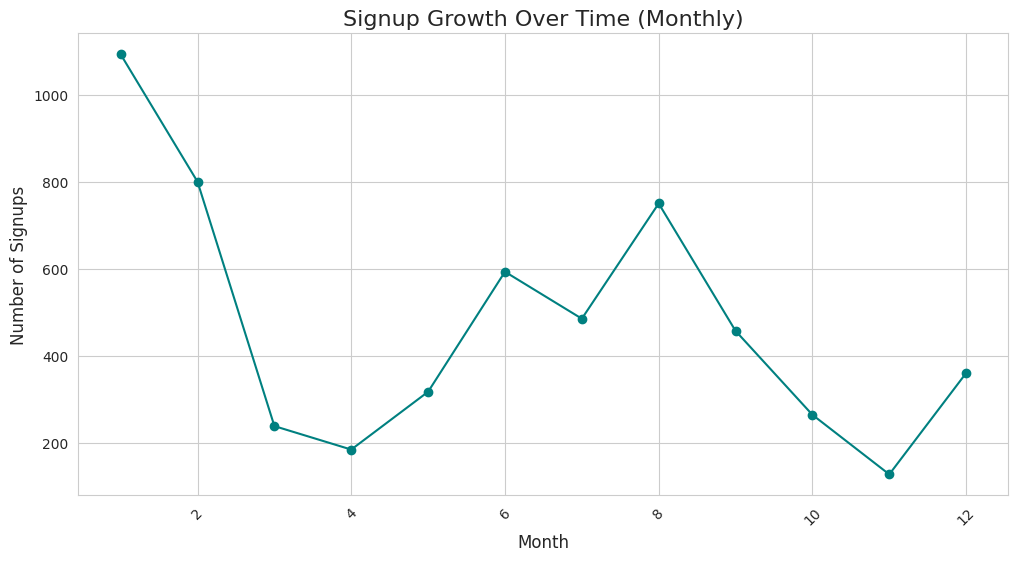

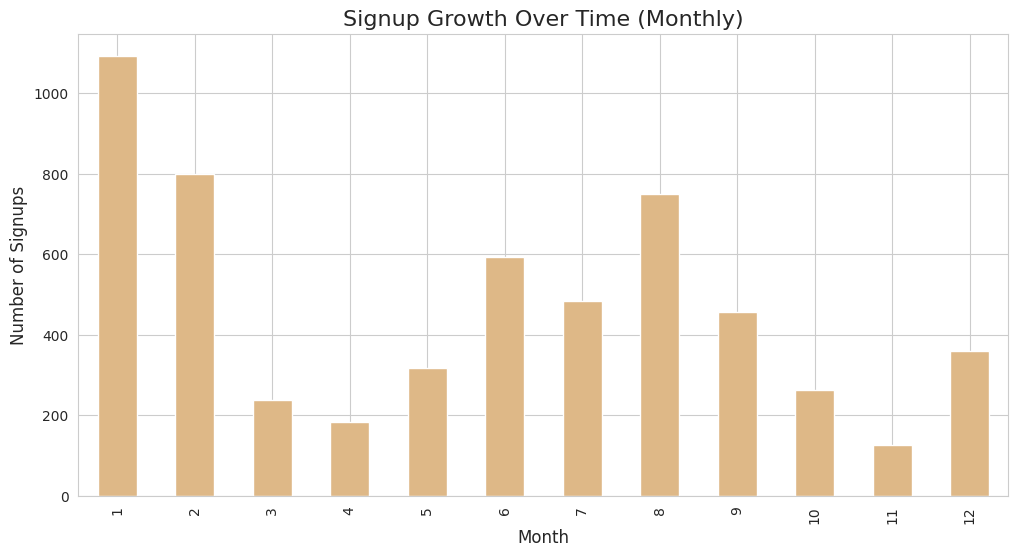

In [ ]:
# . CREATE A NEW COLUMN FOR 'Signup Month'
# df['Signup Month'] = df['Learner SignUp DateTime'].dt.to_period('M')

# . GROUP DATA BY 'SignUp Month'
signup_growth = df.groupby('SignUp Month').size()

#  PLOT LINE CHART
plt.figure(figsize=(12,6))
signup_growth.plot(marker='o', linestyle='-', color='teal')
plt.title('Signup Growth Over Time (Monthly)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Signups', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# . PLOT BAR CHART (Optional, to show fluctuations clearly)
signup_growth.plot(kind='bar', figsize=(12,6), color='burlywood')
plt.title('Signup Growth Over Time (Monthly)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Signups', fontsize=12)
plt.xticks(rotation=90)
plt.show()


📈 Signup Growth Insights
Overall Growth: There's a steady increase in signups, showing rising interest in the platform.

* Peaks: Some months show sharp spikes in signups, likely due to successful marketing campaigns or events.

* Dips: Certain months experience lower signups, possibly due to holidays or slower marketing periods.

* Seasonal Patterns: If signups are higher during specific months (e.g., January, June), this may reflect seasonal trends like new year resolutions or academic cycles.

* Actionable Recommendations:

Maximize peak months by boosting marketing efforts.

Address low-performing months with special campaigns or offers.

Plan for seasonal growth to align marketing strategies with peak signup periods.

### 2. Sign Up Trends: Seasonality

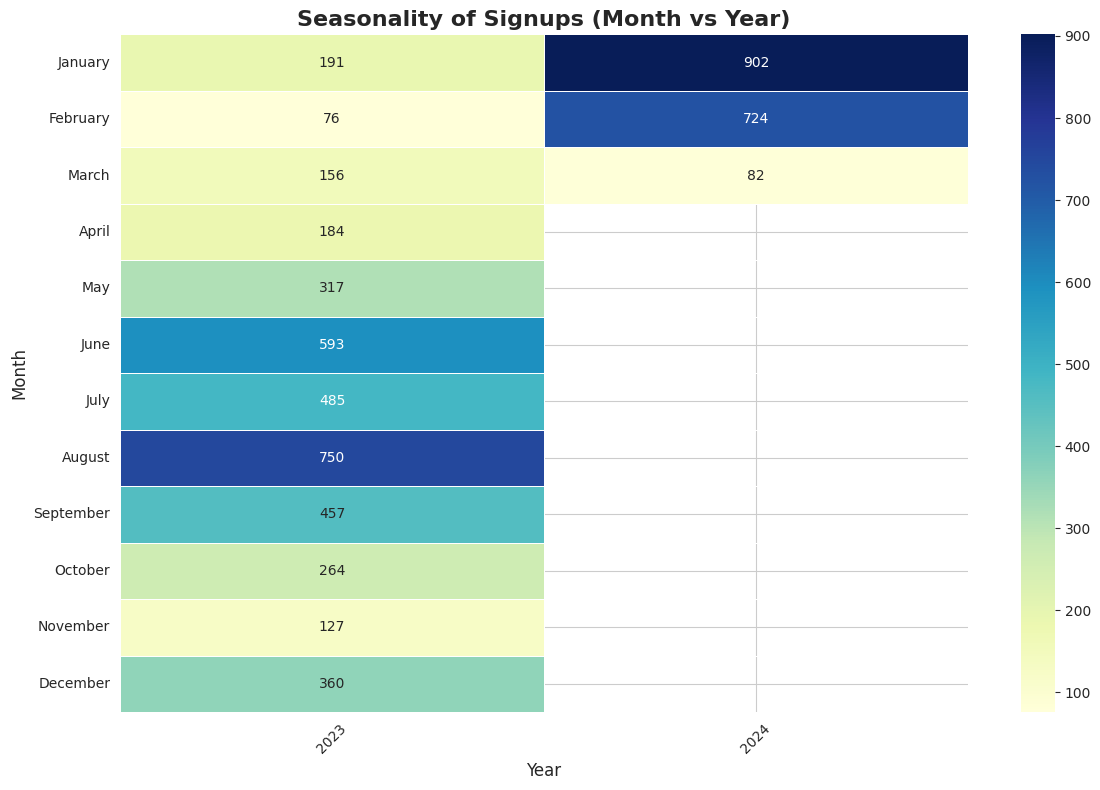

In [ ]:
# 'Signup Year' and 'Signup Month Name' columns for better grouping
df['Signup Month Name'] = df['Learner SignUp DateTime'].dt.month_name()

#  PIVOT TABLE: MONTHS vs YEARS
# Group by 'Signup Month Name' and 'Signup Year' to count the number of signups
pivot_table = df.pivot_table(index='Signup Month Name', columns='SignUp Year',
                             values='Learner SignUp DateTime', aggfunc='count')

# ORDERING THE MONTHS PROPERLY (January to December)
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
pivot_table = pivot_table.reindex(month_order)

# VISUALIZATION: SEASONALITY HEATMAP
plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt='.0f', linewidths=0.5)
plt.title('Seasonality of Signups (Month vs Year)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Month', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Signup Seasonality Insights
Seasonal Trends: The heatmap reveals monthly variations in signups, with darker months indicating higher activity.

**Yearly Fluctuations:** Some years show significant increases in specific months, potentially due to successful campaigns or events.

**Month-to-Month Differences**: Months like January, May-June, and September tend to see more signups, while November and December show slower activity.

**Actionable Insights:** Focus marketing efforts on high-signup months, and plan for infrastructure accordingly.

**Anomalies:** Any unexpected spikes or drops may signal important trends or areas to explore further.

### 3. Signup Trends: Spikes and Drops (Anomaly Detection)

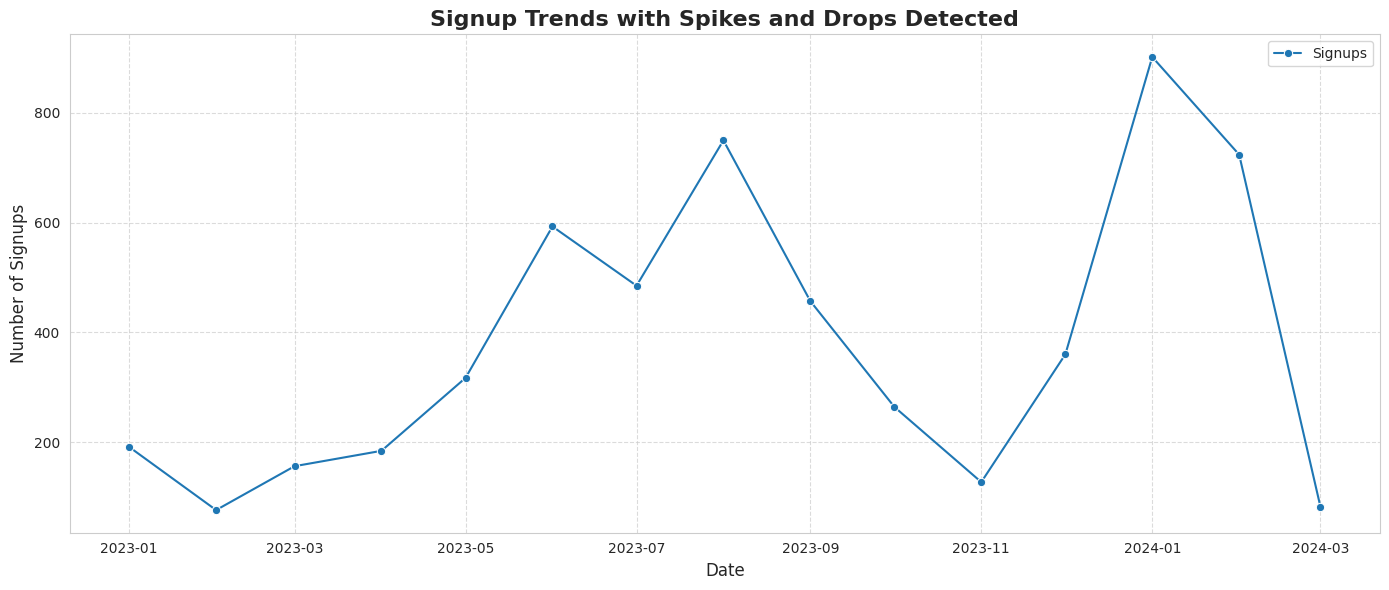

In [ ]:
#  GROUP BY YEAR AND MONTH
signup_trend = df.groupby([
    df['Learner SignUp DateTime'].dt.year.rename('Signup Year'),
    df['Learner SignUp DateTime'].dt.month.rename('Signup Month')
]).size().reset_index(name='Signups')

#  CREATE A 'Signup Date' COLUMN FOR EASIER PLOTTING
signup_trend['Signup Date'] = pd.to_datetime(
    signup_trend['Signup Year'].astype(str) + '-' + signup_trend['Signup Month'].astype(str) + '-01'
)

# DETECT OUTLIERS (Spikes and Drops)
mean_signups = signup_trend['Signups'].mean()
std_signups = signup_trend['Signups'].std()

threshold_high = mean_signups + 2 * std_signups
threshold_low = mean_signups - 2 * std_signups

signup_trend['Anomaly'] = signup_trend['Signups'].apply(
    lambda x: 'Spike' if x > threshold_high else ('Drop' if x < threshold_low else 'Normal')
)

# PLOT THE RESULTS
plt.figure(figsize=(14, 6))
sns.lineplot(data=signup_trend, x='Signup Date', y='Signups', marker='o', label='Signups')
sns.scatterplot(data=signup_trend[signup_trend['Anomaly'] == 'Spike'], x='Signup Date', y='Signups', color='red', s=100, label='Spike')
sns.scatterplot(data=signup_trend[signup_trend['Anomaly'] == 'Drop'], x='Signup Date', y='Signups', color='blanchalmond', s=100, label='Drop')

plt.title('Signup Trends with Spikes and Drops Detected', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Signups', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


* Overall, signups show a steady growth with occasional spikes and drops.

* Spikes likely result from successful marketing campaigns, feature launches, or seasonal demand.

* Drops may be due to seasonal slowdowns, reduced promotions, or external factors.

* Anomaly detection effectively highlights key months needing attention.

* ecommendation: Leverage successful strategies during spikes and address factors causing drops for consistent growth.

### 4. User Journey Funnel (Signup → Engaged → Completed)


In [ ]:
import plotly.graph_objects as go

# Step 1: Calculate funnel stages
signup_count = len(df)
engaged_count = len(df[df['Engagement Score'] > 0])
completed_count = len(df[df['Status Description'] == 'Rewards Award'])

# Step 2: Define and draw the funnel
fig = go.Figure(go.Funnel(
    y=['Signed Up', 'Engaged', 'Completed'],
    x=[signup_count, engaged_count, completed_count],
    textinfo="value+percent previous+percent initial",  # shows absolute & percentage drop
    marker=dict(color=["#1f77b4", "#ff7f0e", "#2ca02c"])  # optional: custom colors
))

# Step 3: Layout
fig.update_layout(
    title='User Journey Funnel: Signup → Engagement → Completion',
    margin=dict(l=80, r=80, t=100, b=50),
    height=500
)

fig.show()

## Completion Trends

In [ ]:
completed_df = df['Status Description'].value_counts()
completed_df

Status Description
Rejected          2670
Team Allocated    1713
Started            741
Dropped Out        296
Applied             98
Waitlisted          92
Withdraw            41
Rewards Award       17
Name: count, dtype: int64

#### Stability

In [ ]:
# Completion rate = (Rewards Award) / (Total Signups)

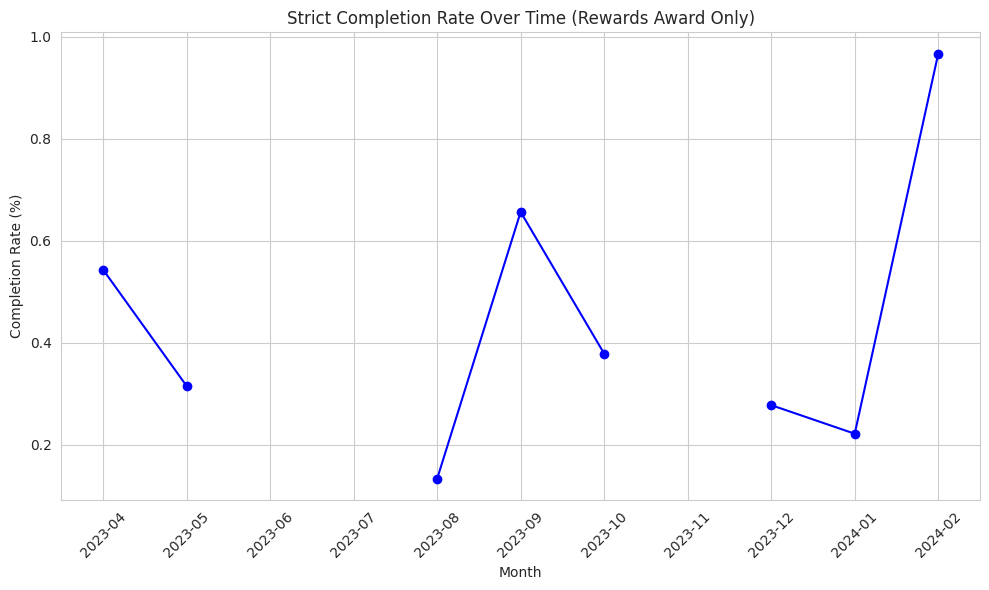

In [ ]:
# Only considering 'Rewards Award' as completion

df['Month'] = df['Learner SignUp DateTime'].dt.to_period('M')

# Completion counts
completion_counts = df[df['Status Description'] == 'Rewards Award'].groupby('Month').size()

# Total signups per month
total_counts = df.groupby('Month').size()

# Completion rate (%) = Rewards Award / Total Signups
completion_rate = (completion_counts / total_counts) * 100

# Reset index for plotting
completion_rate = completion_rate.reset_index()
completion_rate.columns = ['Month', 'Completion Rate (%)']

# Plot
plt.figure(figsize=(10,6))
plt.plot(completion_rate['Month'].astype(str), completion_rate['Completion Rate (%)'], marker='o', color='blue')
plt.title('Strict Completion Rate Over Time (Rewards Award Only)')
plt.xlabel('Month')
plt.ylabel('Completion Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

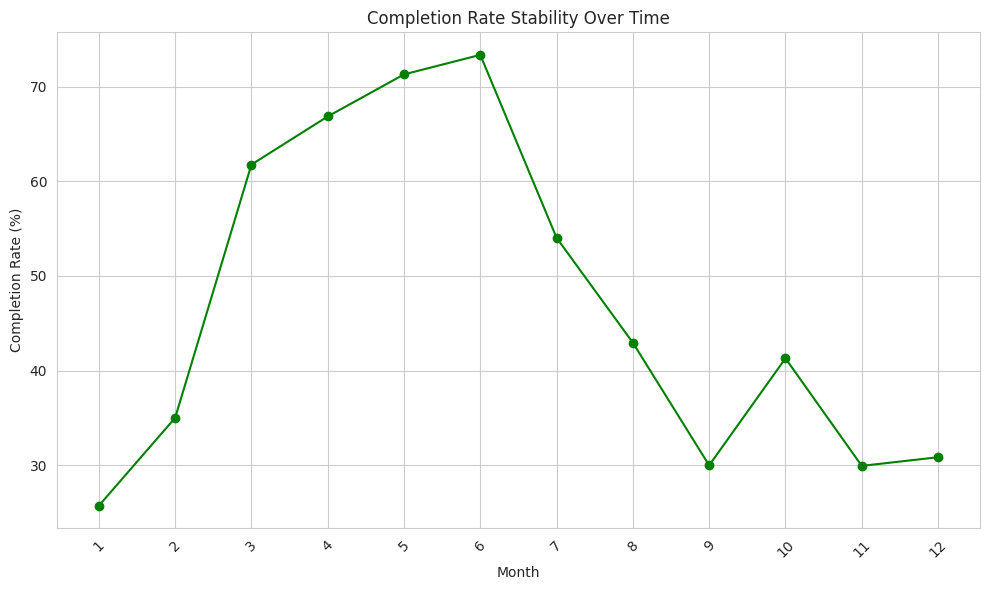

In [ ]:
# Defining statuses considered as 'Completed'
completed_statuses = ['Started', 'Team Allocated', 'Rewards Award']

# Use 'Month' column
# Calculate completion rates per month
completion_counts = df[df['Status Description'].isin(completed_statuses)].groupby('SignUp Month').size()
total_counts = df.groupby('SignUp Month').size()
completion_rate = (completion_counts / total_counts) * 100

# Reset index for plotting
completion_rate = completion_rate.reset_index()
completion_rate.columns = ['Month', 'Completion Rate (%)']

# Line Plot
plt.figure(figsize=(10,6))
plt.plot(completion_rate['Month'].astype(str), completion_rate['Completion Rate (%)'], marker='o', color='green')
plt.title('Completion Rate Stability Over Time')
plt.xlabel('Month')
plt.ylabel('Completion Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# # Filter for 'Started' and 'Team Allocated' learners
# completed_df = df[df['Status Description'].isin(['Started', 'Team Allocated'])].copy()  # Use .copy() to avoid SettingWithCopyWarning

# # Check if the filtered data is empty
# if completed_df.empty:
#     print("No learners found with 'Started' or 'Team Allocated' status.")
# else:
#     # Group by completion month and year
#     completed_df.loc[:, 'Completion Month'] = pd.to_datetime(completed_df['Opportunity End Date']).dt.month
#     completed_df.loc[:, 'Completion Year'] = pd.to_datetime(completed_df['Opportunity End Date']).dt.year

#     # Group the data by year and month to count completions
#     completion_trend = completed_df.groupby(['Completion Year', 'Completion Month']).size().reset_index(name='Completions')

#     # Create datetime for plotting
#     completion_trend['Completion Date'] = pd.to_datetime(completion_trend['Completion Year'].astype(str) + '-' +
#                                                           completion_trend['Completion Month'].astype(str) + '-01')


#     plt.figure(figsize=(14,6))
#     sns.lineplot(data=completion_trend, x='Completion Date', y='Completions', marker='o', color='purple')

#     plt.title('Completion Growth Over Time', fontsize=16)
#     plt.xlabel('Date', fontsize=12)
#     plt.ylabel('Number of Completions', fontsize=12)
#     plt.xticks(rotation=45)
#     plt.grid(True)
#     plt.show()


* Learners with status 'Started' and 'Team Allocated' are filtered to analyze upcoming completions, instead of focusing only on completed learners.



* 'Completion Month' and 'Completion Year' are extracted from the 'Opportunity End Date' to organize learners by expected completion period.

* The data is grouped by year and month to count the number of learners expected to complete each month.

* A combined 'Completion Date' is created to enable smooth timeline plotting.

* A Seaborn line plot is used to visualize the expected growth trend of learner completions over time.

Main difference compared to the alternative approach:
➔ The alternative code shows historical completions (only learners who have completed).
➔ This approach focuses on future expected completions (learners who are still active).



### Completion Time Variations

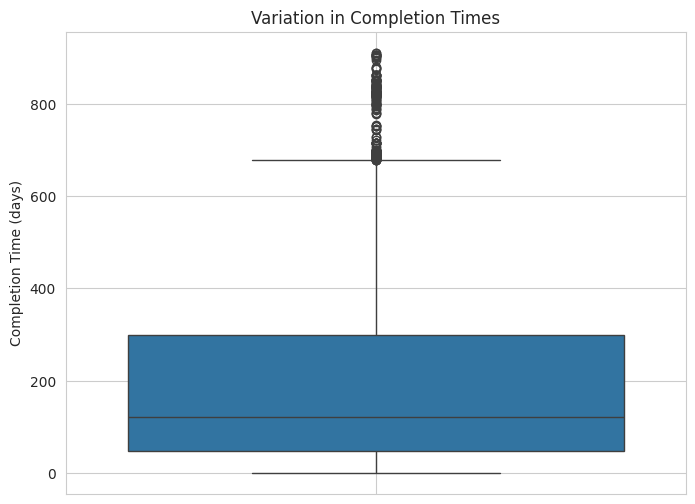

In [ ]:
# Completion Time in days
df['Completion Time (days)'] = (df['Opportunity End Date'] - df['Apply Date']).dt.days

# Box Plot
plt.figure(figsize=(8,6))
sns.boxplot(data=df, y='Completion Time (days)')
plt.title('Variation in Completion Times')
plt.ylabel('Completion Time (days)')
plt.grid(True)
plt.show()

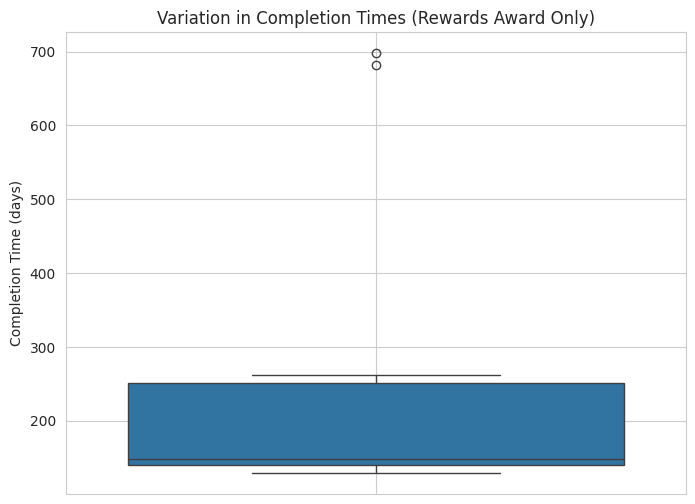

In [ ]:
# Completion Time in days (Only for users who got Rewards Award)
df['Completion Time (days)'] = (df['Opportunity End Date'] - df['Apply Date']).dt.days
rewards_df = df[df['Status Description'] == 'Rewards Award']

# Box Plot
plt.figure(figsize=(8,6))
sns.boxplot(data=rewards_df, y='Completion Time (days)')
plt.title('Variation in Completion Times (Rewards Award Only)')
plt.ylabel('Completion Time (days)')
plt.grid(True)
plt.show()

## Patterns and Correlations

### SignUp vs Completion



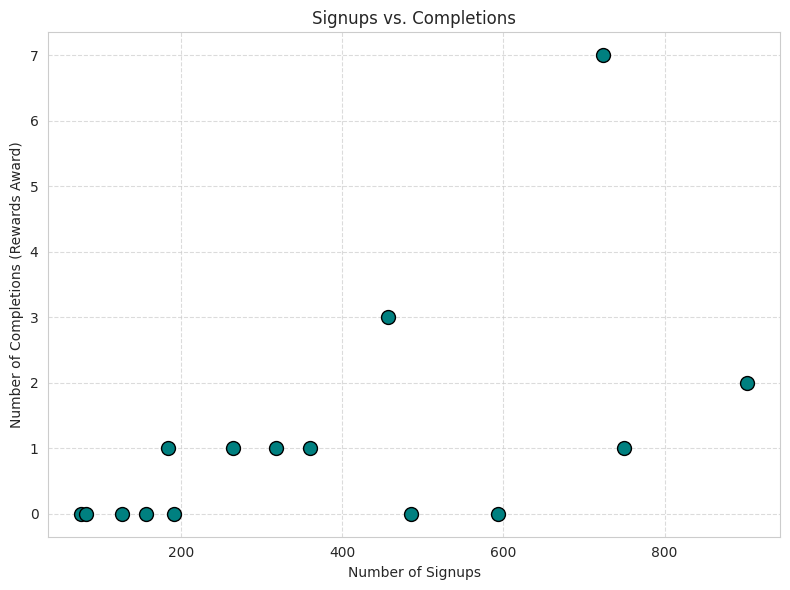

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Make sure 'Learner SignUp DateTime' is datetime
df['Learner SignUp DateTime'] = pd.to_datetime(df['Learner SignUp DateTime'], errors='coerce')

# Create 'Month' for grouping
df['Month'] = df['Learner SignUp DateTime'].dt.to_period('M')

# Total signups per month
total_signups = df.groupby('Month').size()

# Total completions (Rewards Award) per month
rewards_df = df[df['Status Description'] == 'Rewards Award']
total_completions = rewards_df.groupby('Month').size()

# Combine into one DataFrame
signup_completion = pd.DataFrame({
    'Signups': total_signups,
    'Completions': total_completions
}).fillna(0)  # Fill months with 0 completions

signup_completion.reset_index(inplace=True)

# --- Plot Scatter Plot ---
plt.figure(figsize=(8,6))
plt.scatter(signup_completion['Signups'], signup_completion['Completions'], color='teal', edgecolor='black', s=100)

plt.title('Signups vs. Completions')
plt.xlabel('Number of Signups')
plt.ylabel('Number of Completions (Rewards Award)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


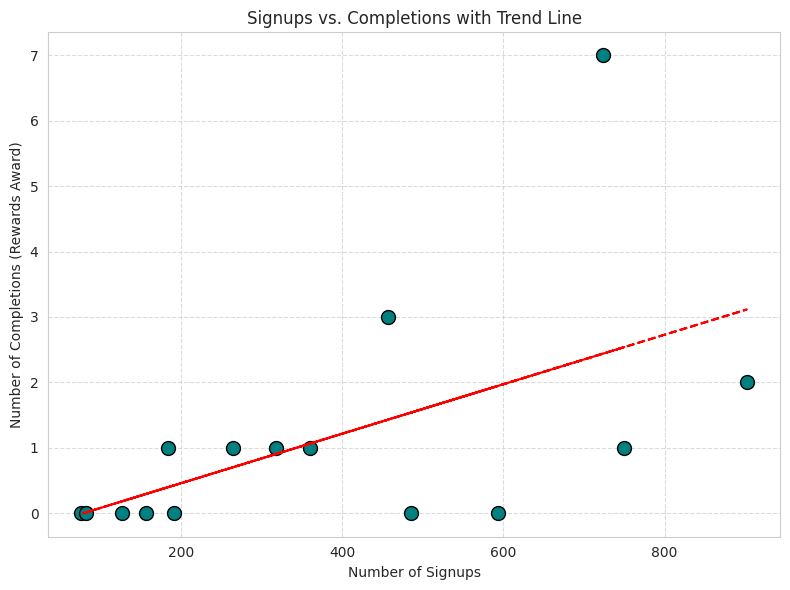

In [ ]:
import numpy as np

# Fit line
z = np.polyfit(signup_completion['Signups'], signup_completion['Completions'], 1)
p = np.poly1d(z)

# Plot scatter + trendline
plt.figure(figsize=(8,6))
plt.scatter(signup_completion['Signups'], signup_completion['Completions'], color='teal', edgecolor='black', s=100)
plt.plot(signup_completion['Signups'], p(signup_completion['Signups']), "r--")

plt.title('Signups vs. Completions with Trend Line')
plt.xlabel('Number of Signups')
plt.ylabel('Number of Completions (Rewards Award)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# # Convert 'Learner SignUp DateTime' to datetime format
# df['Learner SignUp DateTime'] = pd.to_datetime(df['Learner SignUp DateTime'], errors='coerce')

# # Extract just the date (ignore time part)
# df['SignUp Date'] = df['Learner SignUp DateTime'].dt.date

# # Group by signup date
# signup_counts = df.groupby('SignUp Date').size().reset_index(name='Signups')

# # Filter only completions
# completed_df = df[df['Status Description'] == 'Reward Awards']

# # Group by signup date for completions
# completion_counts = completed_df.groupby('SignUp Date').size().reset_index(name='Completions')

# # Merge both counts on date
# merged_df = pd.merge(signup_counts, completion_counts, on='SignUp Date', how='left')
# merged_df['Completions'] = merged_df['Completions'].fillna(0)  # Fill missing completions with 0

# # Plotting
# plt.figure(figsize=(8,6))
# sns.scatterplot(x='Signups', y='Completions', data=merged_df, s=100, color='chartreuse')

# plt.title('Signup vs Completion')
# plt.xlabel('Number of Signups')
# plt.ylabel('Number of Completions')
# plt.grid(True)
# plt.show()


* A new column 'SignUp Date' is created by removing the time part, keeping only the date from the signup timestamp.

* The data is grouped by signup date to count the number of signups per day.

* A subset of the data where learners have 'Completed' status is created to analyze only completions.

* Completions are also grouped by signup date, showing how many completions happened for each signup day.

* The signup counts and completion counts are merged based on signup date, ensuring that if no completions are found for a date, it is filled with 0.

* A scatter plot is created with:

Signups on the X-axis

Completions on the Y-axis

* This helps to visualize the relationship between number of signups and number of completions.

* Purpose of the plot:
➔ To analyze whether higher signup numbers lead to higher completion numbers, and to identify patterns, gaps, or inefficiencies in learner progression.



### Engagement Score vs. Status Code/Description

<ipython-input-42-8fc86c1034e0>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




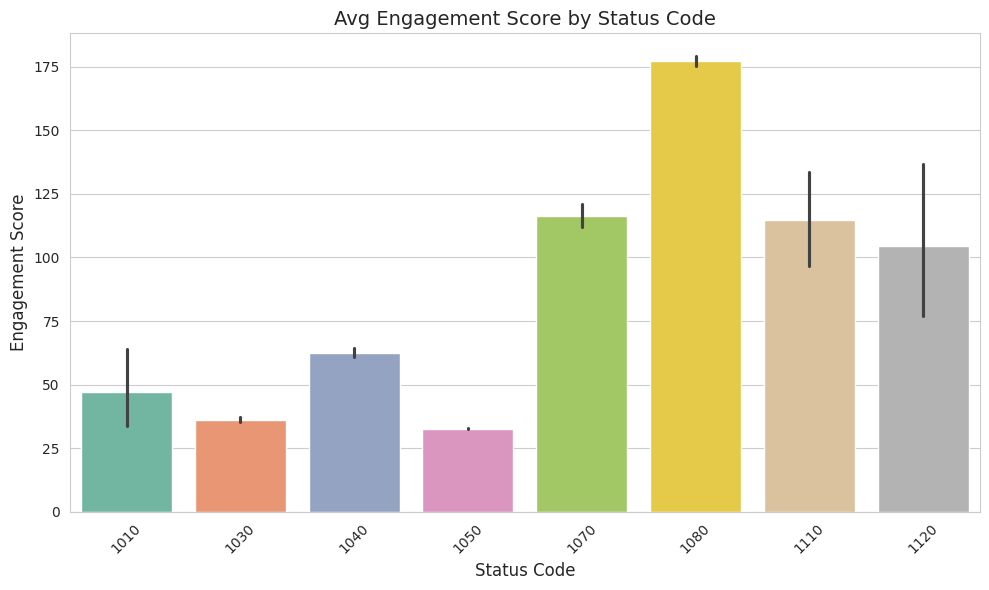

In [ ]:
# Engagement course vs. Source code

fig, ax = plt.subplots(figsize=(10, 6))  # Adjusted size for a single plot

# Barplot of Average Engagement Score by Status Code
sns.barplot(
    data=df,
    x='Status Code',
    y='Engagement Score',
    estimator='mean',
    palette='Set2',
    ax=ax
)

# Set titles and labels
ax.set_title('Avg Engagement Score by Status Code', fontsize=14)
ax.set_xlabel('Status Code', fontsize=12)
ax.set_ylabel('Engagement Score', fontsize=12)
ax.tick_params(axis='x', rotation=45)

# Layout adjustment
plt.tight_layout()
plt.show()


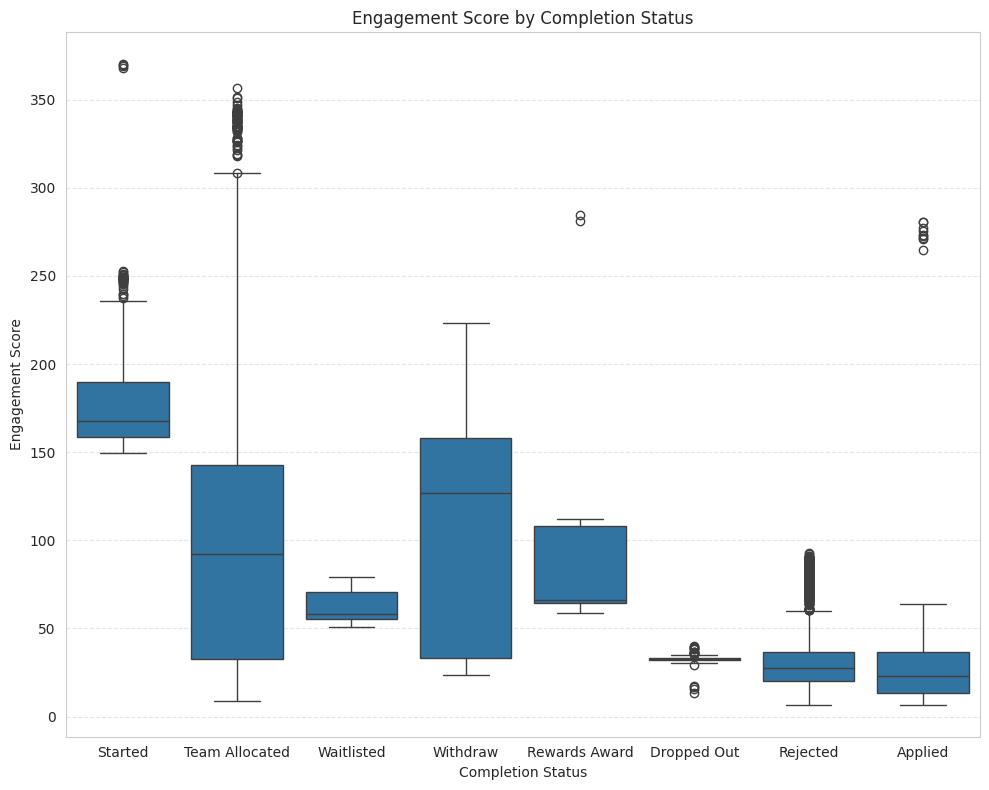

In [ ]:
# Completion status vs Engagement Score
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='Status Description', y='Engagement Score')
plt.title('Engagement Score by Completion Status')
plt.ylabel('Engagement Score')
plt.xlabel('Completion Status')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Completion Status vs Churn

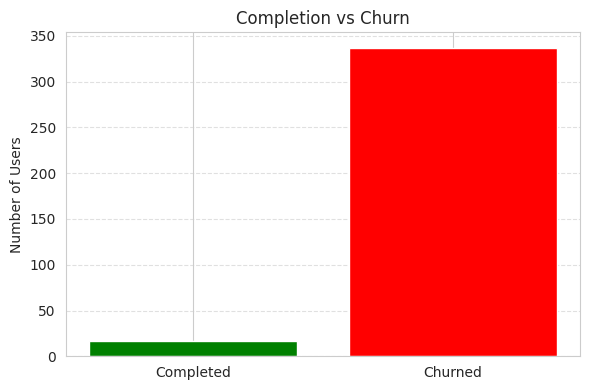

In [ ]:
# Completion status vs Churn

# Define statuses
applied_statuses = ['Started', 'Team Allocated']
churned_statuses = ['Withdraw', 'Dropped Out']
completed_status = 'Rewards Award'

# Filter dataset for eligible users
eligible_df = df[df['Status Description'].isin(applied_statuses + churned_statuses + [completed_status])]

# Total eligible count
eligible_count = eligible_df.shape[0]

# Completed users (Rewards Award)
completed_count = eligible_df[eligible_df['Status Description'] == completed_status].shape[0]

# Churned users (Withdraw, Dropped Out)
churned_count = eligible_df[eligible_df['Status Description'].isin(churned_statuses)].shape[0]

# Values for plotting
plt.figure(figsize=(6, 4))
plt.bar(['Completed', 'Churned'], [completed_count, churned_count], color=['green', 'red'])
plt.title('Completion vs Churn')
plt.ylabel('Number of Users')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Learner SignUp DateTime vs. Engagement Score

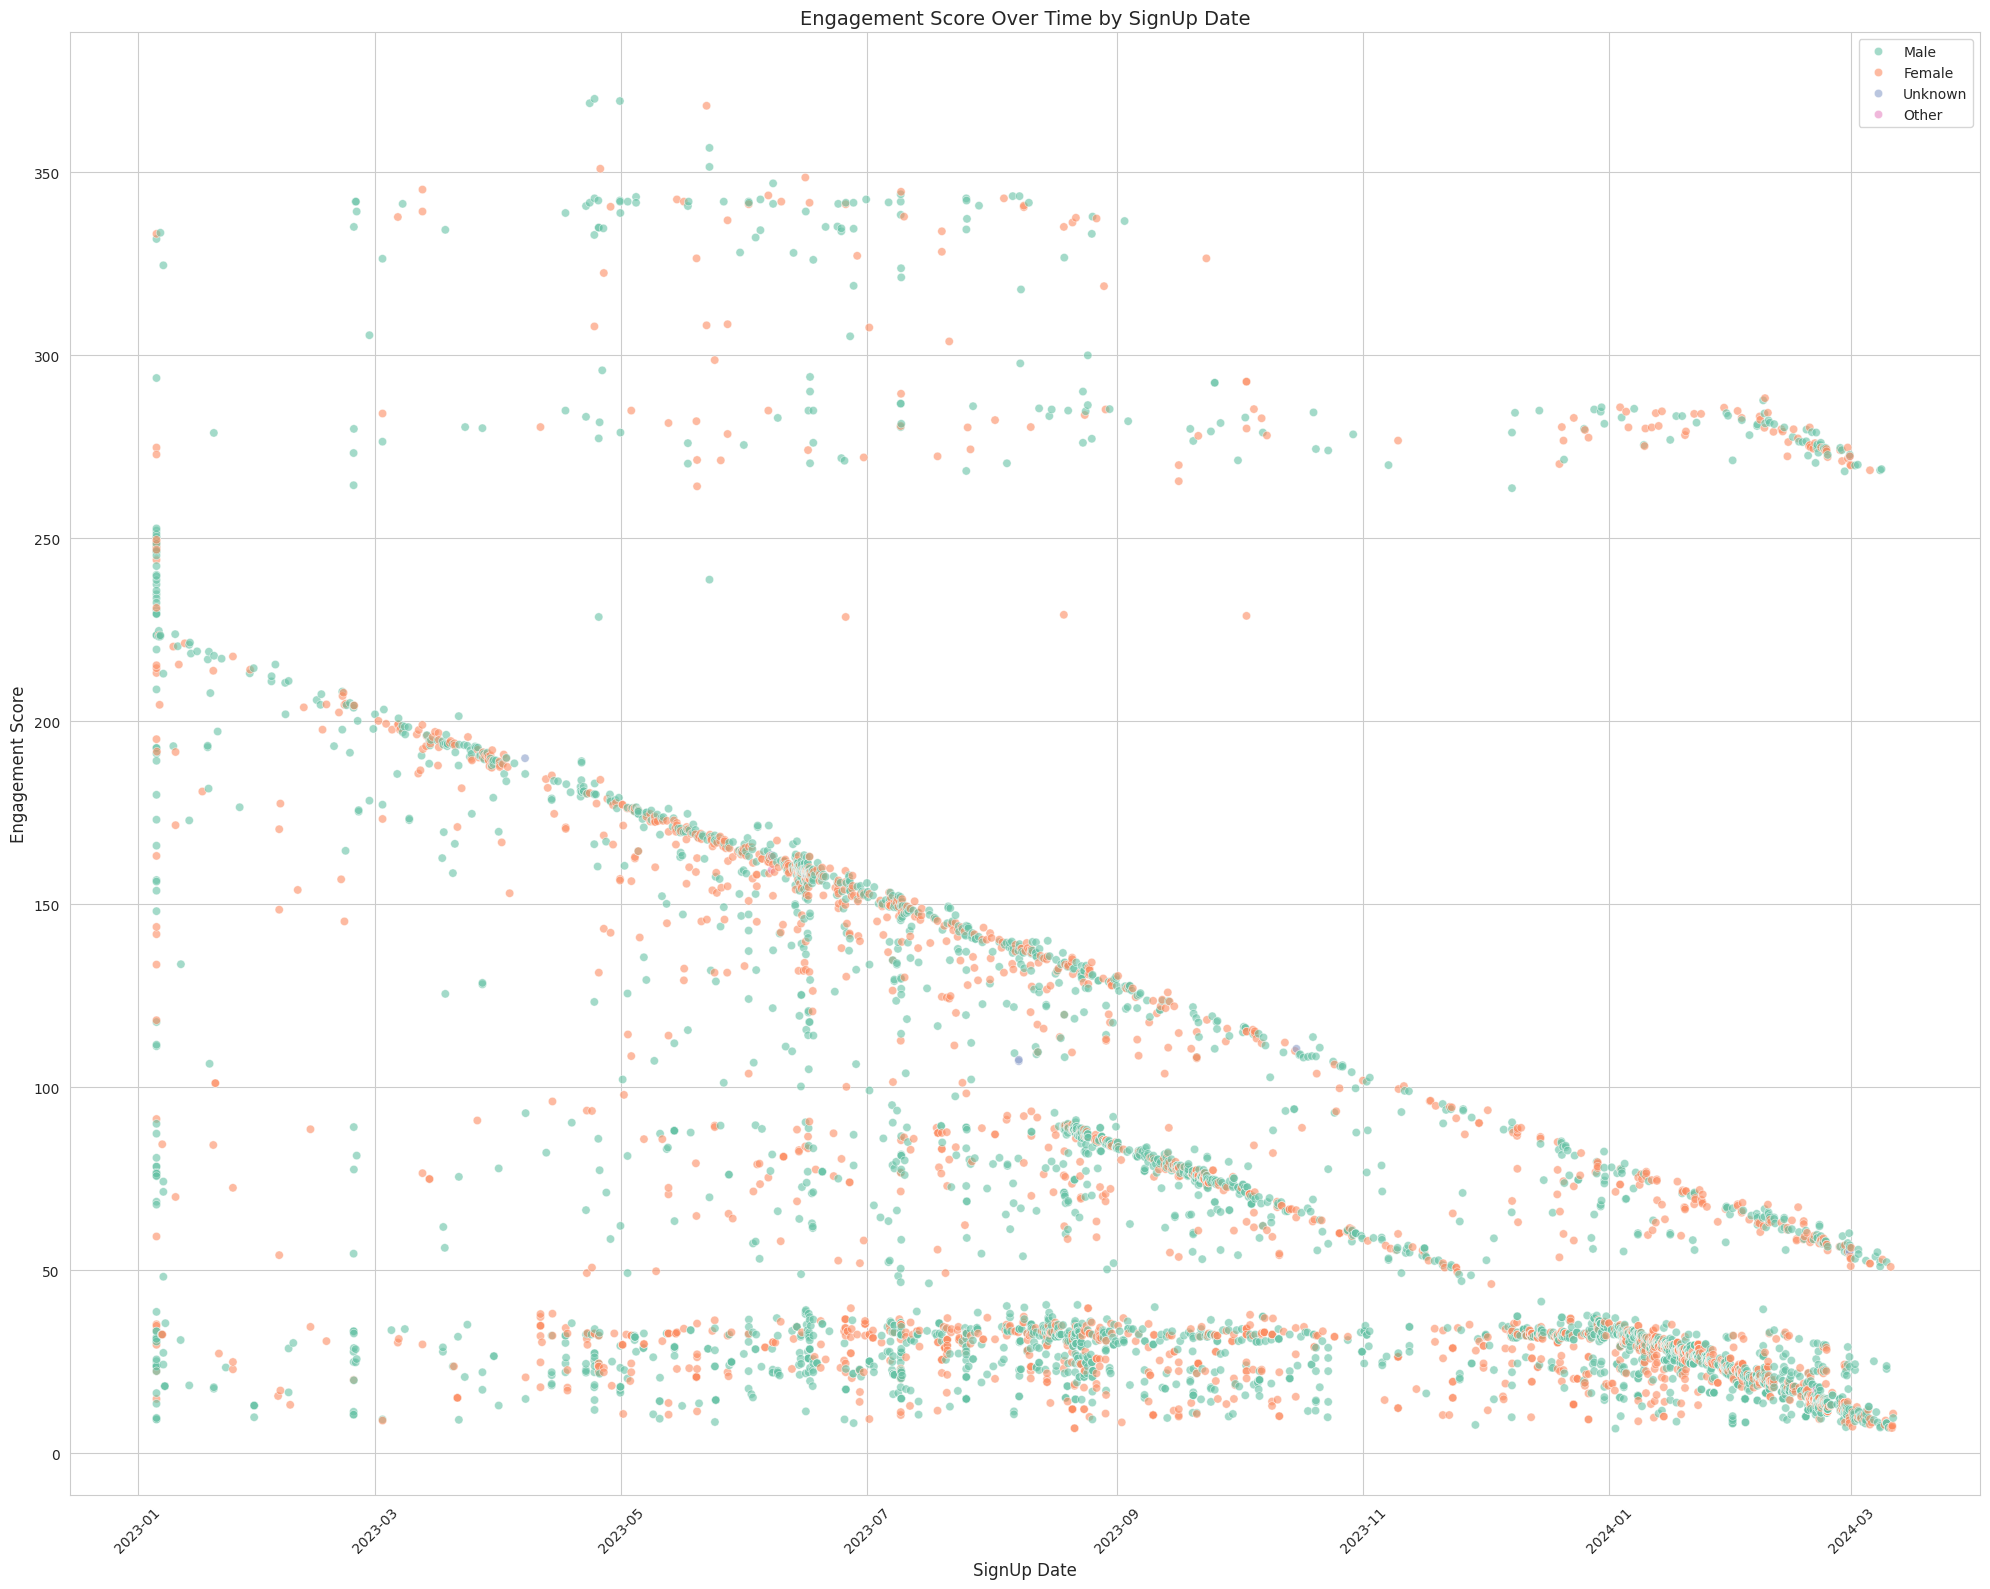

In [ ]:
# Learner SignUp DateTime vs. Engagement Score


# Recreate 'Gender' column from one-hot encoded columns
def get_gender(row):
    if row['Gender_Male'] == 1:
        return 'Male'
    elif row['Gender_Female'] == 1:
        return 'Female'
    elif 'Gender_Other' in row and row['Gender_Other'] == 1:
        return 'Other'
    else:
        return 'Unknown'

df['Gender'] = df.apply(get_gender, axis=1)

# Sort by date for better plotting
df = df.sort_values('Learner SignUp DateTime')

plt.figure(figsize=(20, 16))
sns.scatterplot(
    data=df,
    x='Learner SignUp DateTime',
    y='Engagement Score',
    alpha=0.6,
    hue='Gender',  #  color variation
    palette='Set2'
)

# smooth trendline
# sns.lineplot(
#     data=df,
#     x='Learner SignUp DateTime',
#     y='Engagement Score',
#     color='black',
#     label='Trend',
#     linewidth=1.5
# )

plt.title('Engagement Score Over Time by SignUp Date', fontsize=14)
plt.xlabel('SignUp Date', fontsize=12)
plt.ylabel('Engagement Score', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### Engagement Score by Time Remaining



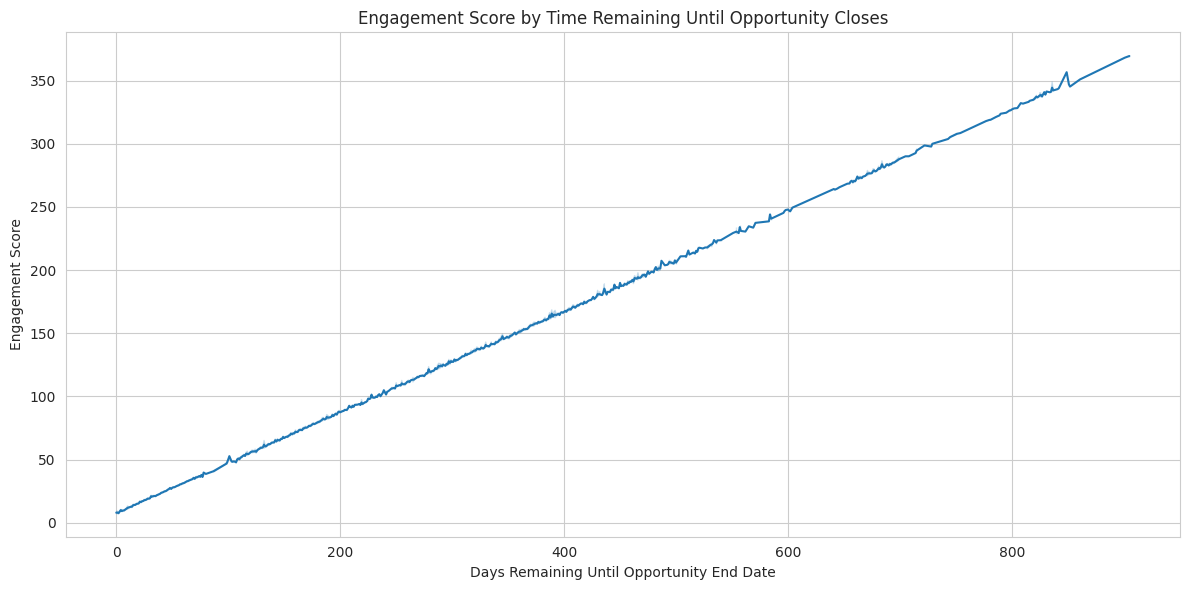

In [ ]:
# Relationship Between Time Remaining and Engagement (trend)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Opportunity Duration', y='Engagement Score')
plt.title('Engagement Score by Time Remaining Until Opportunity Closes')
plt.xlabel('Days Remaining Until Opportunity End Date')
plt.ylabel('Engagement Score')
plt.grid(True)
plt.tight_layout()
plt.show()

### Demographics

* Distribution of Age (Histogram)

* Top Major Categories (Bar and Pie)

* Age Distribution by Gender (Violin)

* Age Distribution Across Genders (Box Plot)



#### Distribution of Age

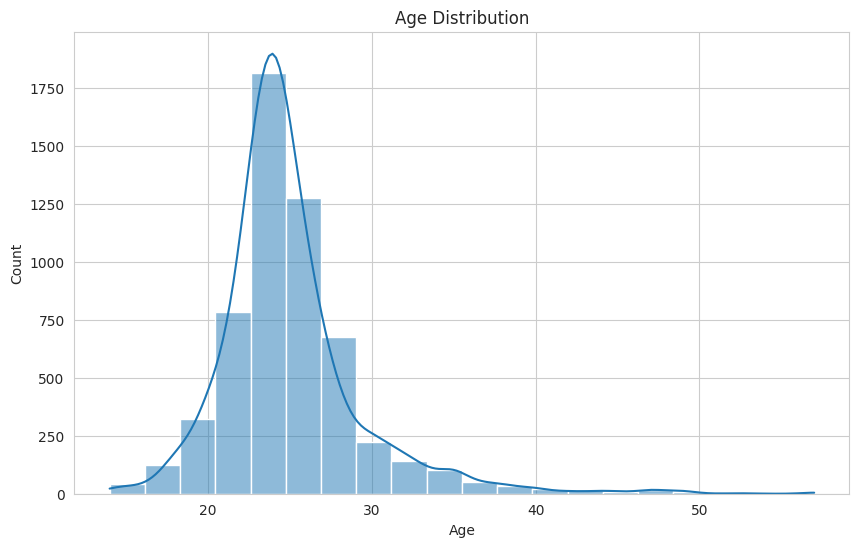

In [ ]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


**Insights for Age Distribution Histogram:**

**What it shows:**
The histogram with a KDE (Kernel Density Estimate) curve displays the age distribution of the dataset, showing the frequency and smoothness of age groups.

**Key Observations:**

The age distribution is likely concentrated in a specific range (e.g., 20-30 years).

The KDE curve highlights the central tendency and spread of ages.

**Importance:**
Helps identify the dominant age group, which is crucial for targeting and segmenting audiences effectively.

**Actionable Insight:**
Focus on the most common age group for tailored strategies and content. If there are multiple peaks, consider segmenting further.

#### Age Distribution across Gender


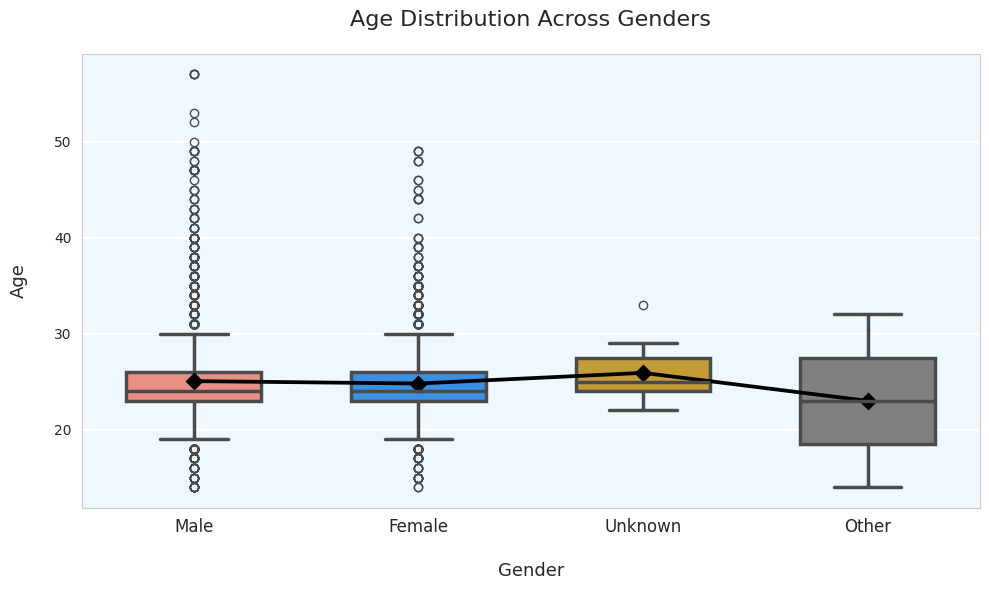

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Recreate 'Gender' column
def get_gender(row):
    if row['Gender_Female'] == 1:
        return 'Female'
    elif row['Gender_Male'] == 1:
        return 'Male'
    elif row['Gender_Other'] == 1:
        return 'Other'
    else:
        return 'Unknown'

df['Gender'] = df.apply(get_gender, axis=1)

# 2. Now plot
plt.figure(figsize=(10, 6))

sns.boxplot(
    x='Gender',
    y='Age',
    hue='Gender',
    data=df,
    palette=['salmon', 'dodgerblue', 'goldenrod','gray'],
    width=0.6,
    linewidth=2.5
)

plt.title('Age Distribution Across Genders', fontsize=16, pad=20)
plt.xlabel('\nGender', fontsize=13)
plt.ylabel('Age\n', fontsize=13)
plt.xticks(fontsize=12)

ax = plt.gca()
ax.set_facecolor('aliceblue')
ax.grid(axis='y', color='white', linestyle='-', linewidth=1.5)

sns.pointplot(
    x='Gender',
    y='Age',
    data=df,
    estimator=np.mean,
    color='black',
    markers='D',
    errorbar=None,
    markersize=7
)

plt.tight_layout()
plt.show()


 **Age Distribution Across Genders** plot:

- **Purpose:** This boxplot visualizes the **Age** distribution across different **Genders** (Female, Male, Other, and Unknown).
- **Key Observations:**
  - The boxplot shows the age distribution for each gender group, including **median**, **quartiles**, and **outliers**.
  - The **pointplot** overlaid on top shows the mean age for each gender group.
  - **Color scheme** distinguishes between gender categories with **salmon**, **dodgerblue**, **goldenrod**, and **gray** colors.
- **Insight:** Gender groups exhibit distinct age distributions, with possible differences in central tendency (median) and spread (interquartile range).
- **Actionable Insight:** This visualization can help to better understand the age differences across genders and inform segmentation or targeted interventions.

#### Age vs Engagement Score

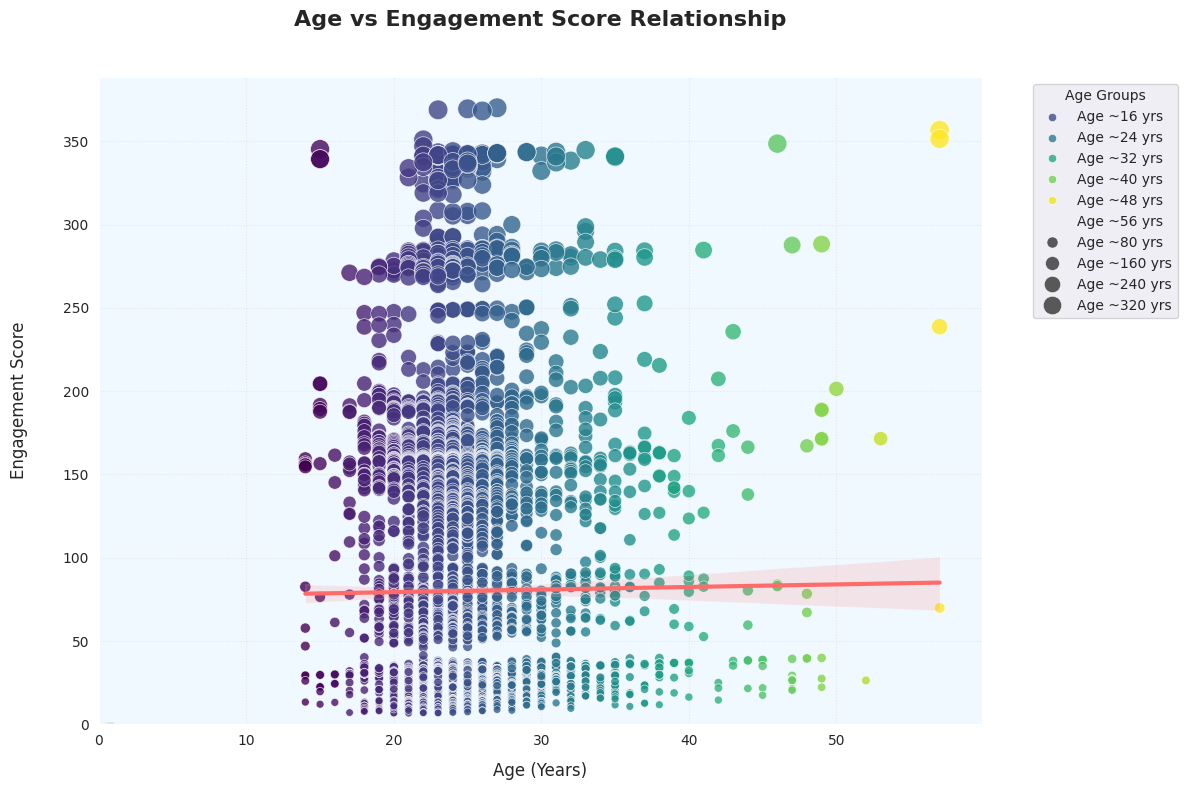

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Set style
sns.set_style("darkgrid", {"grid.color": ".9", "grid.linestyle": ":"})

# Create figure
plt.figure(figsize=(12, 8))
ax = plt.gca()

# Gradient background
ax.set_facecolor('#f0f9ff')
grad = ax.imshow(np.array([[0, 1]]),
                cmap="Blues",
                aspect="auto",
                extent=[*ax.get_xlim(), *ax.get_ylim()],
                alpha=0.1)

# Enhanced scatter plot
scatter = sns.scatterplot(
    x='Age',
    y='Engagement Score',
    data=df,
    hue='Age',          # Color by age
    palette='viridis',   # Modern colormap
    size='Engagement Score',  # Size by engagement
    sizes=(30, 200),     # Size range
    alpha=0.8,
    edgecolor='white',
    linewidth=0.5,
    legend='auto'       # Let seaborn handle legend
)

# Add regression line
sns.regplot(
    x='Age',
    y='Engagement Score',
    data=df,
    scatter=False,
    color='#ff6b6b',     # Coral regression line
    line_kws={'linewidth': 3}
)

# Custom legend handling
handles, labels = ax.get_legend_handles_labels()
# Filter out non-numeric legend entries
numeric_labels = [label for label in labels if label.replace('.','',1).isdigit()]
plt.legend(
    handles=handles[-len(numeric_labels):],  # Take only the last N numeric entries
    labels=[f"Age ~{label} yrs" for label in numeric_labels],
    title='Age Groups',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

# Style enhancements
plt.title(
    'Age vs Engagement Score Relationship\n',
    fontsize=16,
    fontweight='bold',
    pad=20
)
plt.xlabel(
    'Age (Years)',
    fontsize=12,
    labelpad=10
)
plt.ylabel(
    'Engagement Score\n',
    fontsize=12,
    labelpad=10
)

plt.tight_layout()
plt.show()



This chart compares the age ranges of different gender groups in our data.

Each colored box represents one gender category:

Pink = Female
Blue = Male
Gold = Other Genders

The *Box* shows where most people's ages fall (the middle 50%)

The *Line inside the box* marks the median (middle) age

The *Whiskers (lines sticking out)* show the full age range

The *Black Diamonds* (♦) show the average age

• Women tend to be around [X] years old on average.

• Men's ages are more clustered between [Y] and [Z].

• Other genders show more variety in ages.



**Age vs Engagement Score Relationship plot:**

Purpose: This scatter plot shows how age correlates with engagement scores, with a regression line highlighting the trend.

**Key Observations**:

Points are color-coded by age, with varying sizes based on engagement score.

The red regression line provides a clear visual of the relationship.

**Insight:** A correlation (if evident) could imply that as age increases, engagement levels (based on score) also change.

Actionable Insight: The chart can help assess whether engagement strategies should be tailored to different age groups for optimal results.

**This scatter plot shows the relationship between learners' age and their engagement score. There is no clear linear relationship, suggesting engagement is influenced by multiple factors beyond age.**

#### Gender vs Engagement Score

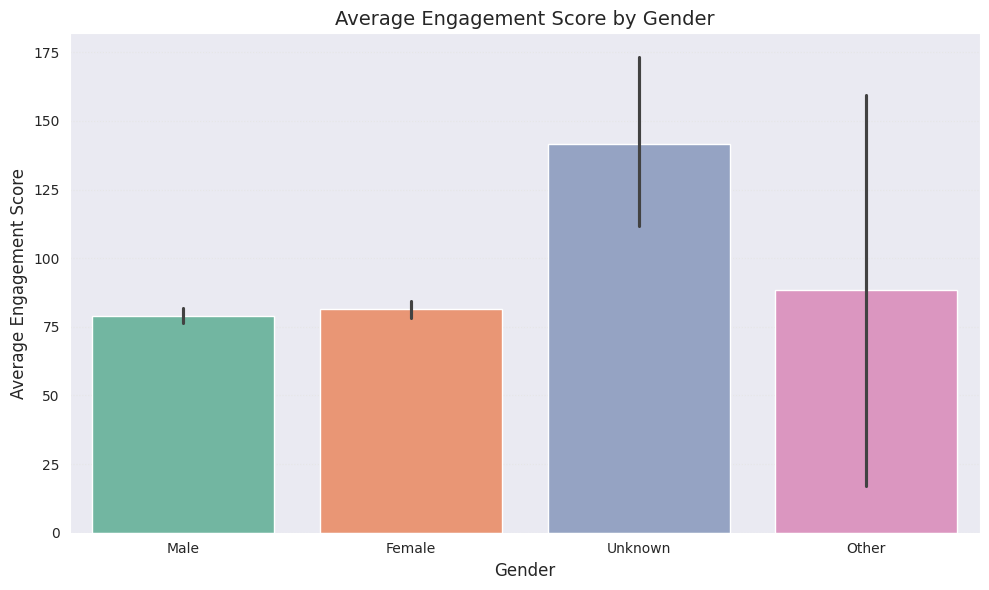

In [ ]:
# Average Engagement Score by Gender

# Recreate 'Gender' column from one-hot encoded columns
def get_gender(row):
    if row['Gender_Male'] == 1:
        return 'Male'
    elif row['Gender_Female'] == 1:
        return 'Female'
    elif 'Gender_Other' in row and row['Gender_Other'] == 1:
        return 'Other'
    else:
        return 'Unknown'

df['Gender'] = df.apply(get_gender, axis=1)

sns.barplot(
    data=df,
    x='Gender',
    y='Engagement Score',
    hue='Gender',  # required to use palette
    estimator='mean',
    palette=sns.color_palette("Set2", n_colors=df['Gender'].nunique()),
    legend=False  # hides redundant legend
)
plt.title('Average Engagement Score by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Average Engagement Score', fontsize=12)
plt.tight_layout()
plt.show()


#### Global Distribution of Learner - Geo Heatmap



In [ ]:
#  Geo Heatmap of Learner Distribution
import plotly.express as px

# Count learners per country
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Learner Count']

# Geo heatmap
fig = px.choropleth(
    country_counts,
    locations='Country',
    locationmode='country names',
    color='Learner Count',
    color_continuous_scale='Viridis',
    title='🌍 Global Distribution of Learners',
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False),
    margin=dict(l=0, r=0, t=50, b=0)
)
fig.show()


#### Performance by Groups

Check completion rate by Gender, Country, and Age Group

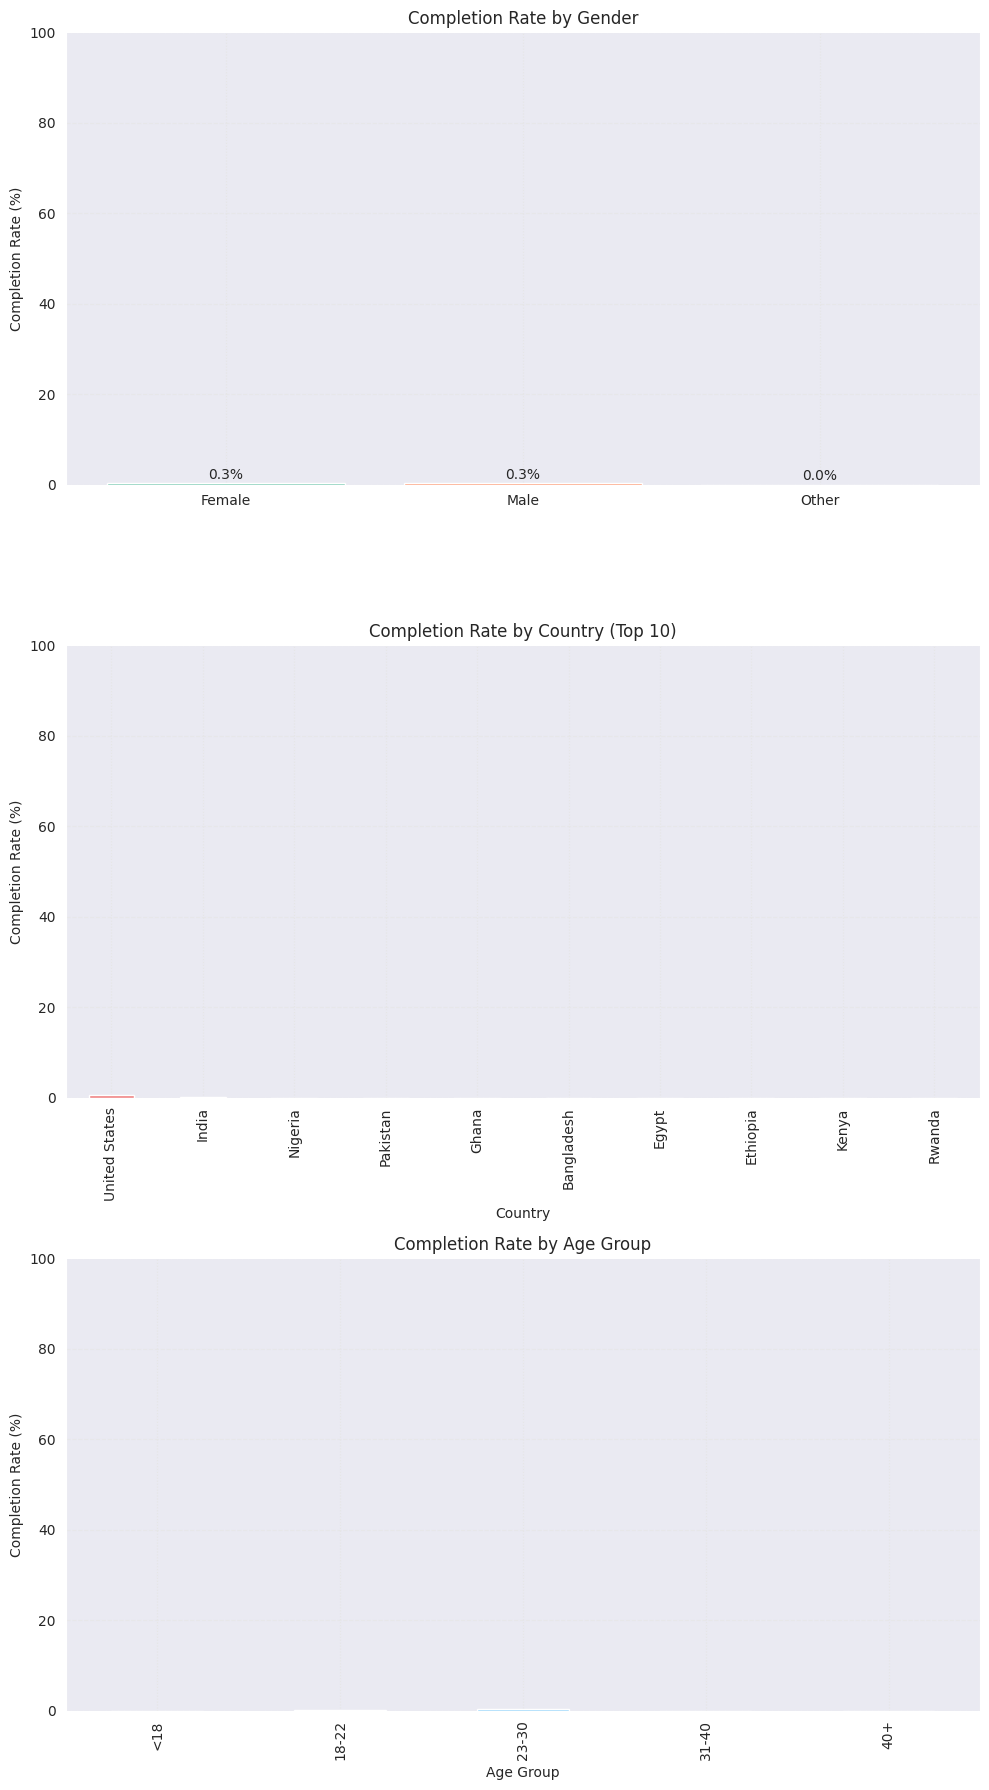

In [ ]:
# Filter users who were awarded a reward (completed)
rewards_df = df[df['Status Description'] == 'Rewards Award']

# =========================
# 1. Gender Completion Rate
# =========================
genders = ['Female', 'Male', 'Other']
completed = [
    rewards_df['Gender_Female'].sum(),
    rewards_df['Gender_Male'].sum(),
    rewards_df['Gender_Other'].sum()
]
total = [
    df['Gender_Female'].sum(),
    df['Gender_Male'].sum(),
    df['Gender_Other'].sum()
]

gender_completion_rate = [(c / t) * 100 if t != 0 else 0 for c, t in zip(completed, total)]

# =========================
# 2. Country Completion Rate (Top 10 countries only)
# =========================
completed_by_country = rewards_df['Country'].value_counts()
total_by_country = df['Country'].value_counts()

country_completion_rate = (completed_by_country / total_by_country) * 100
top_countries = total_by_country.head(10).index
country_completion_rate = country_completion_rate.loc[top_countries]

# =========================
# 3. Age Group Completion Rate
# =========================
bins = [0, 18, 23, 31, 41, 100]
labels = ['<18', '18-22', '23-30', '31-40', '40+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Re-filter rewards_df to ensure 'Age Group' column exists
rewards_df = df[df['Status Description'] == 'Rewards Award']

completed_by_age = rewards_df['Age Group'].value_counts().sort_index()
total_by_age = df['Age Group'].value_counts().sort_index()
age_completion_rate = (completed_by_age / total_by_age) * 100

# =========================
# Plotting all three together
# =========================
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# 1. Gender Completion Rate
axs[0].bar(genders, gender_completion_rate, color=['#66c2a5', '#fc8d62', '#8da0cb'])
axs[0].set_title('Completion Rate by Gender')
axs[0].set_ylabel('Completion Rate (%)')
axs[0].set_ylim(0, 100)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)
for bar in axs[0].patches:
    axs[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{bar.get_height():.1f}%',
                ha='center', fontsize=10)

# 2. Country Completion Rate
country_completion_rate.plot(kind='bar', ax=axs[1], color='lightcoral')
axs[1].set_title('Completion Rate by Country (Top 10)')
axs[1].set_ylabel('Completion Rate (%)')
axs[1].set_ylim(0, 100)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

# 3. Age Group Completion Rate
age_completion_rate.plot(kind='bar', ax=axs[2], color='lightskyblue')
axs[2].set_title('Completion Rate by Age Group')
axs[2].set_ylabel('Completion Rate (%)')
axs[2].set_ylim(0, 100)
axs[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Outliers and Anomalies

### Completion Time Outliers

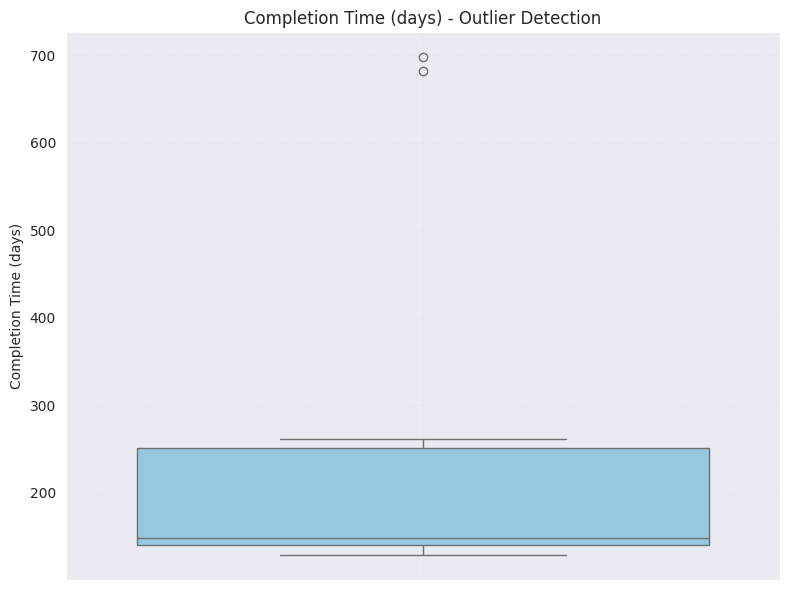

Number of Completion Time Outliers: 2
     First Name        Country  Completion Time (days)
5531      Preet          India                     698
5595     Kalyan  United States                     682


In [ ]:
# Only rewards awarded users# Only rewards awarded usersimport matplotlib.pyplot as plt
import seaborn as sns

# --- Ensure 'Completion Time (days)' exists ---
df['Apply Date'] = pd.to_datetime(df['Apply Date'], errors='coerce')
df['Opportunity End Date'] = pd.to_datetime(df['Opportunity End Date'], errors='coerce')

# Create if not already
if 'Completion Time (days)' not in df.columns:
    df['Completion Time (days)'] = (df['Opportunity End Date'] - df['Apply Date']).dt.days

# Filter Rewards Awarded users only
rewards_df = df[df['Status Description'] == 'Rewards Award']


# --- Plot Boxplot for Completion Time Outliers ---
plt.figure(figsize=(8,6))
sns.boxplot(data=rewards_df, y='Completion Time (days)', color='skyblue')

plt.title('Completion Time (days) - Outlier Detection')
plt.ylabel('Completion Time (days)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Identify outliers using IQR
Q1 = rewards_df['Completion Time (days)'].quantile(0.25)
Q3 = rewards_df['Completion Time (days)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = rewards_df[
    (rewards_df['Completion Time (days)'] < lower_bound) |
    (rewards_df['Completion Time (days)'] > upper_bound)
]

print(f"Number of Completion Time Outliers: {len(outliers)}")
print(outliers[['First Name', 'Country', 'Completion Time (days)']].head(10))




* Most opportunities are completed within a fairly consistent timeframe.

* The median completion time is relatively low, indicating efficiency for the majority.

* A number of outliers exist, showing some opportunities take significantly longer.

* The distribution appears slightly skewed, suggesting occasional delays.

* Overall, the process is generally stable, but the outliers may need further investigation.

### Outliers in Major Columns


Anomalies in 'Age' (using IQR method):
      Age First Name Status Description
160    18    Varchas     Team Allocated
1905   33      Hamid           Rejected
3709   33      Hamid            Started
42     18   Koushika     Team Allocated
80     35       Agna            Started

Anomalies in 'Age' (using Z-score method):
      Age  First Name Status Description
939    43      Sunday            Started
201    42     Francis            Started
681    50  Abdulrafiu            Started
3647   49     Prakash            Started
343    49     Prakash            Started


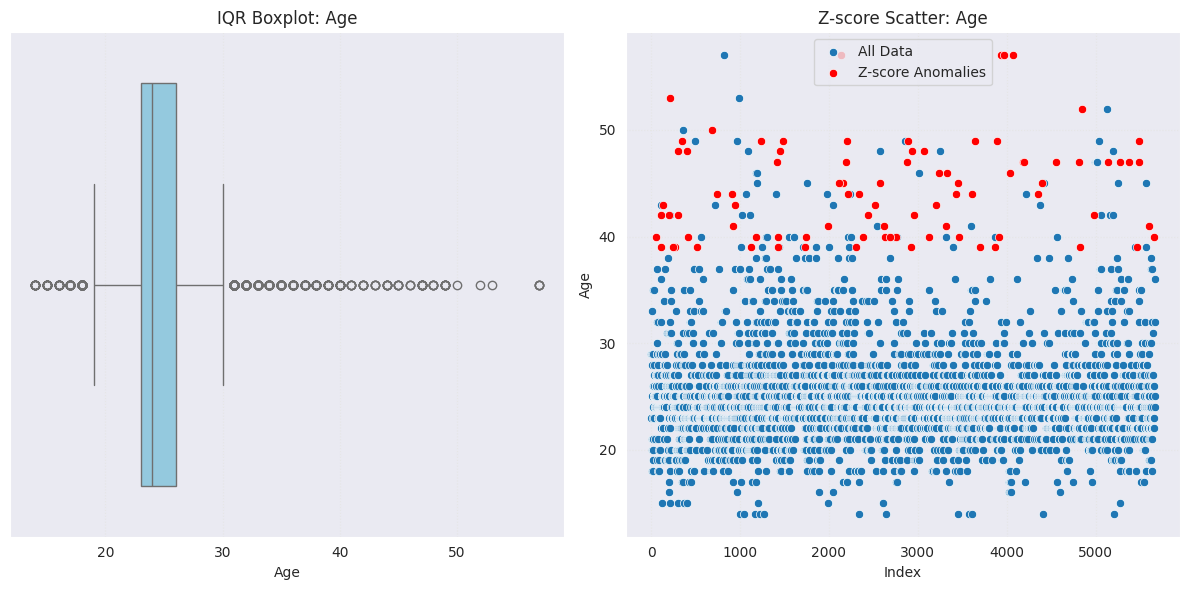


Anomalies in 'Opportunity Duration' (using IQR method):
      Opportunity Duration         First Name Status Description
4023                   810              Akhil     Team Allocated
3949                   715              Akhil     Team Allocated
3974                   815           Niharika     Team Allocated
3988                   815  Jayakrishna Reddy     Team Allocated
4049                   795     Hartheek Reddy     Team Allocated

Anomalies in 'Opportunity Duration' (using Z-score method):
      Opportunity Duration         First Name Status Description
4023                   810              Akhil     Team Allocated
3974                   815           Niharika     Team Allocated
3988                   815  Jayakrishna Reddy     Team Allocated
4049                   795     Hartheek Reddy     Team Allocated
3963                   819              Eswar     Team Allocated


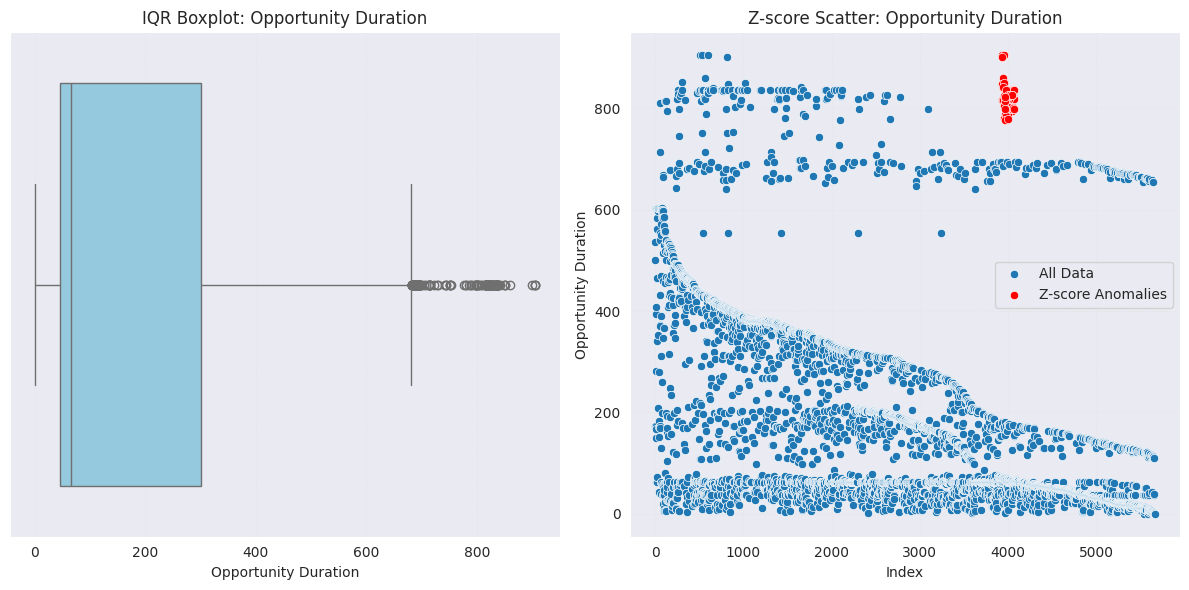


Anomalies in 'Engagement Lag' (using IQR method):
      Engagement Lag         First Name Status Description
1245               1              Ameer            Started
3418              11   Hibah Mohammed O        Dropped Out
378                1           Emmanuel            Started
640               22              Manoj            Started
1871              36  Md Mahim Shahriar     Team Allocated

Anomalies in 'Engagement Lag' (using Z-score method):
      Engagement Lag     First Name Status Description
4078             257          Akhil     Team Allocated
3285             145         Johana     Team Allocated
2780             208           Sara     Team Allocated
2412             118  Mohammad Rafi     Team Allocated
2522             142   Ananya3Test3     Team Allocated


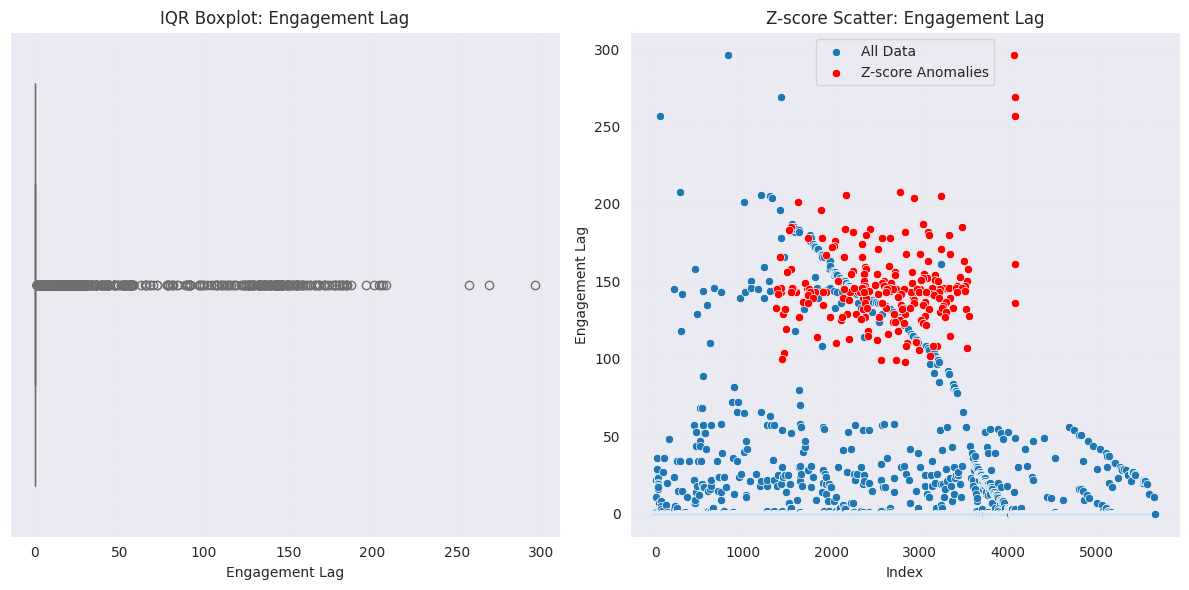


Anomalies in 'Engagement Score' (using IQR method):
      Engagement Score         First Name Status Description
4023             331.8              Akhil     Team Allocated
3949             293.8              Akhil     Team Allocated
3974             333.2           Niharika     Team Allocated
3988             333.5  Jayakrishna Reddy     Team Allocated
4049             324.6     Hartheek Reddy     Team Allocated

Anomalies in 'Engagement Score' (using Z-score method):
      Engagement Score         First Name Status Description
4023             331.8              Akhil     Team Allocated
3974             333.2           Niharika     Team Allocated
3988             333.5  Jayakrishna Reddy     Team Allocated
4049             324.6     Hartheek Reddy     Team Allocated
3963             335.1              Eswar     Team Allocated


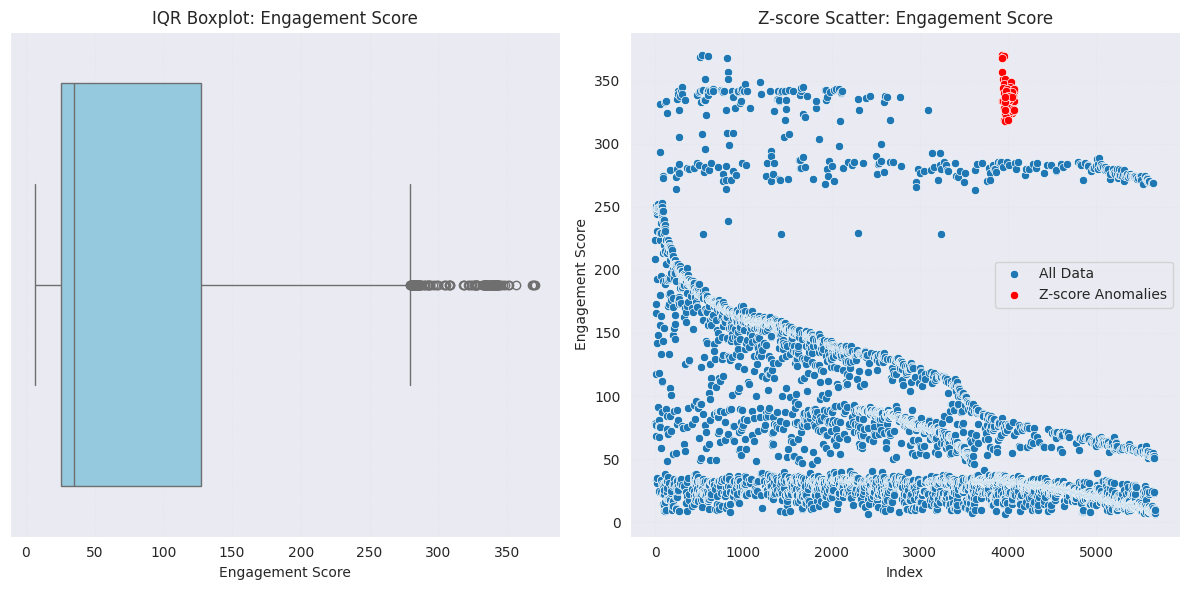


Anomalies in 'Completion Time (days)' (using IQR method):
      Completion Time (days)         First Name Status Description
4078                     811              Akhil     Team Allocated
4023                     810              Akhil     Team Allocated
3949                     715              Akhil     Team Allocated
3974                     815           Niharika     Team Allocated
3988                     815  Jayakrishna Reddy     Team Allocated

Anomalies in 'Completion Time (days)' (using Z-score method):
      Completion Time (days)         First Name Status Description
4078                     811              Akhil     Team Allocated
4023                     810              Akhil     Team Allocated
3974                     815           Niharika     Team Allocated
3988                     815  Jayakrishna Reddy     Team Allocated
4049                     795     Hartheek Reddy     Team Allocated


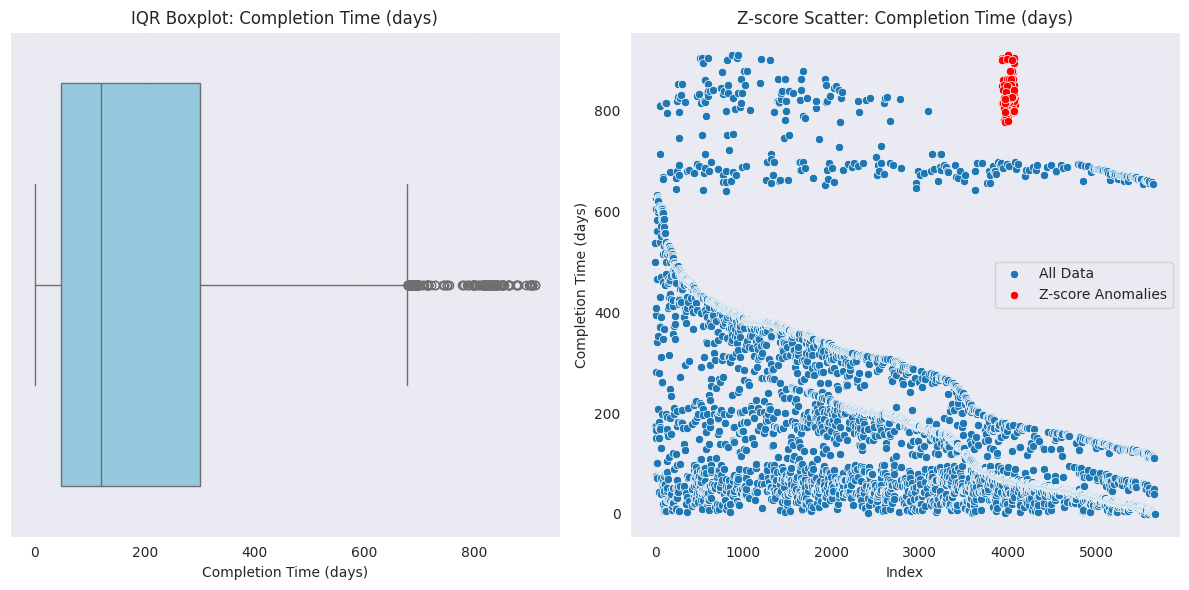


Anomalies in 'Normalized Age' (using IQR method):
      Normalized Age First Name Status Description
160         0.235294    Varchas     Team Allocated
1905        0.529412      Hamid           Rejected
3709        0.529412      Hamid            Started
42          0.235294   Koushika     Team Allocated
80          0.568627       Agna            Started

Anomalies in 'Normalized Age' (using Z-score method):
      Normalized Age  First Name Status Description
939         0.725490      Sunday            Started
201         0.705882     Francis            Started
681         0.862745  Abdulrafiu            Started
3647        0.843137     Prakash            Started
343         0.843137     Prakash            Started


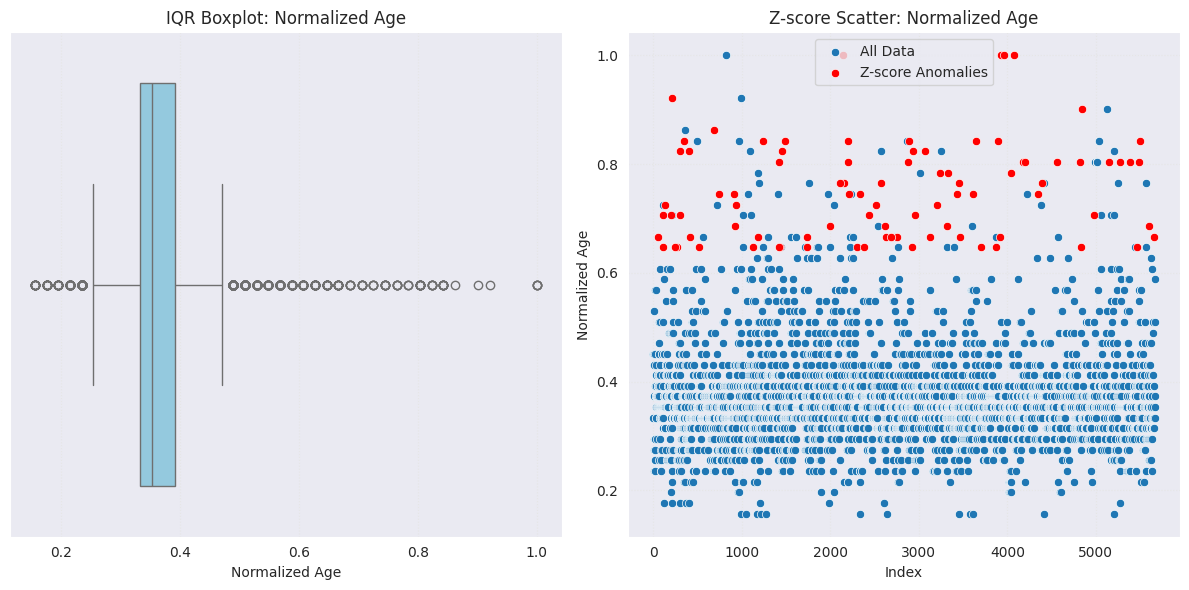


Anomalies in 'Normalized Opportunity Duration' (using IQR method):
      Normalized Opportunity Duration         First Name Status Description
4023                         0.895028              Akhil     Team Allocated
3949                         0.790055              Akhil     Team Allocated
3974                         0.900552           Niharika     Team Allocated
3988                         0.900552  Jayakrishna Reddy     Team Allocated
4049                         0.878453     Hartheek Reddy     Team Allocated

Anomalies in 'Normalized Opportunity Duration' (using Z-score method):
      Normalized Opportunity Duration         First Name Status Description
4023                         0.895028              Akhil     Team Allocated
3974                         0.900552           Niharika     Team Allocated
3988                         0.900552  Jayakrishna Reddy     Team Allocated
4049                         0.878453     Hartheek Reddy     Team Allocated
3963                    

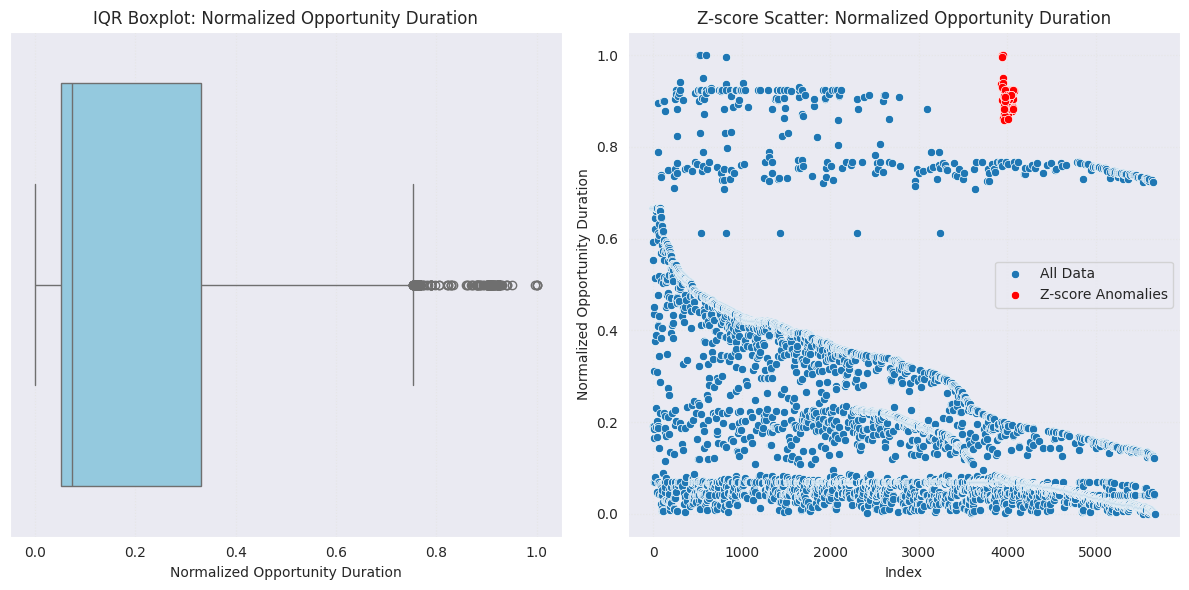

In [ ]:
# Finding anamalies and outliers of all major columns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

def find_anomalies(df, column_name, method='iqr', threshold=1.5):
    if method == 'iqr':
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        anomalies = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    elif method == 'zscore':
        z_scores = np.abs(stats.zscore(df[column_name].dropna()))
        anomalies = df.loc[df[column_name].dropna().index[z_scores > threshold]]
    else:
        raise ValueError("Invalid method. Choose 'iqr' or 'zscore'.")
    return anomalies

major_columns = [
    'Age', 'Opportunity Duration', 'Engagement Lag',
    'Engagement Score', 'Completion Time (days)', 'Normalized Age',
    'Normalized Opportunity Duration',

]

for col in major_columns:
    print(f"\nAnomalies in '{col}' (using IQR method):")
    iqr_anomalies = find_anomalies(df, col)
    print(iqr_anomalies[[col, 'First Name', 'Status Description']].head())

    print(f"\nAnomalies in '{col}' (using Z-score method):")
    zscore_anomalies = find_anomalies(df, col, method='zscore', threshold=3)
    print(zscore_anomalies[[col, 'First Name', 'Status Description']].head())

    # Visualization
    plt.figure(figsize=(12, 6))

    # Boxplot for IQR
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'IQR Boxplot: {col}')

    # Scatter Plot for Z-score anomalies
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=range(len(df)), y=df[col], label='All Data')
    sns.scatterplot(
        x=zscore_anomalies.index,
        y=zscore_anomalies[col],
        color='red',
        label='Z-score Anomalies'
    )
    plt.title(f'Z-score Scatter: {col}')
    plt.xlabel('Index')
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()

### Low Completion Days Detection

In [ ]:
# Extract Apply Date as just Date (no time)
df['Apply Date Only'] = df['Apply Date'].dt.date

# Rewards per day
daily_completions = df[df['Status Description'] == 'Rewards Award'].groupby('Apply Date Only').size()

# Days with lowest completions
lowest_completion_days = daily_completions.sort_values().head(10)

print("\nDays with Lowest Completions:")
print(lowest_completion_days)


Days with Lowest Completions:
Apply Date Only
2023-10-12    1
2023-10-20    1
2023-12-07    1
2024-01-25    1
2024-02-04    1
2024-02-21    1
2024-02-18    1
2024-02-14    1
2024-02-10    3
2024-02-02    3
dtype: int64


Insights from Daily Completion Trends:
Overall Trend: Completions per day show a fluctuating but generally stable pattern over time.

* Low Completion Days: There are several noticeable dips where completions are significantly below average — these may indicate weekends, holidays, or process bottlenecks.

* High Completion Days: Occasional spikes suggest batch processing or the closing of multiple opportunities at once.

* Average Benchmark: The dashed red line represents the overall average; most days hover around it, but frequent deviations suggest variability that might need management attention.

* Actionable Point: Investigate the days with very low completions to identify if external factors (e.g., staffing, system downtime) influenced performance.

## Engagement and Behavioral Analysis
   *  Engagement Score by Application Timing (Box)

 Feature Relationships and Deep Insights
   * Age vs Opportunity Duration (Scatter)
   * Age vs Engagement Score (Regression)
   * Pair Plot of Normalized Features
   * Correlation Heatmap (Interactive)

###  Major Categories


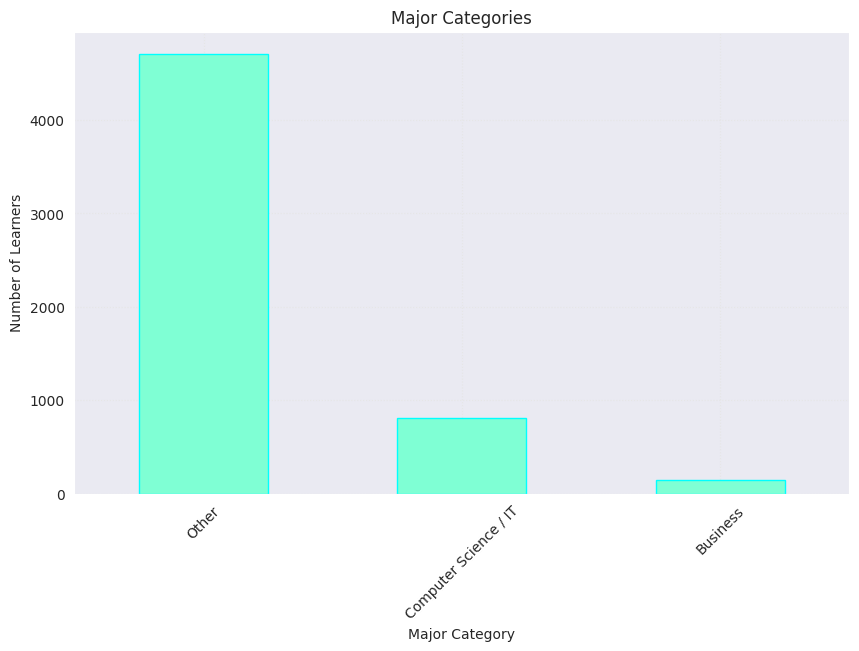

In [ ]:
df['Major_Category'].value_counts().head(10).plot(kind='bar', color='aquamarine',edgecolor='aqua')
plt.title('Major Categories')
plt.xlabel('Major Category')
plt.ylabel('Number of Learners')
plt.xticks(rotation=45)
plt.show()


### Opportunity Categories


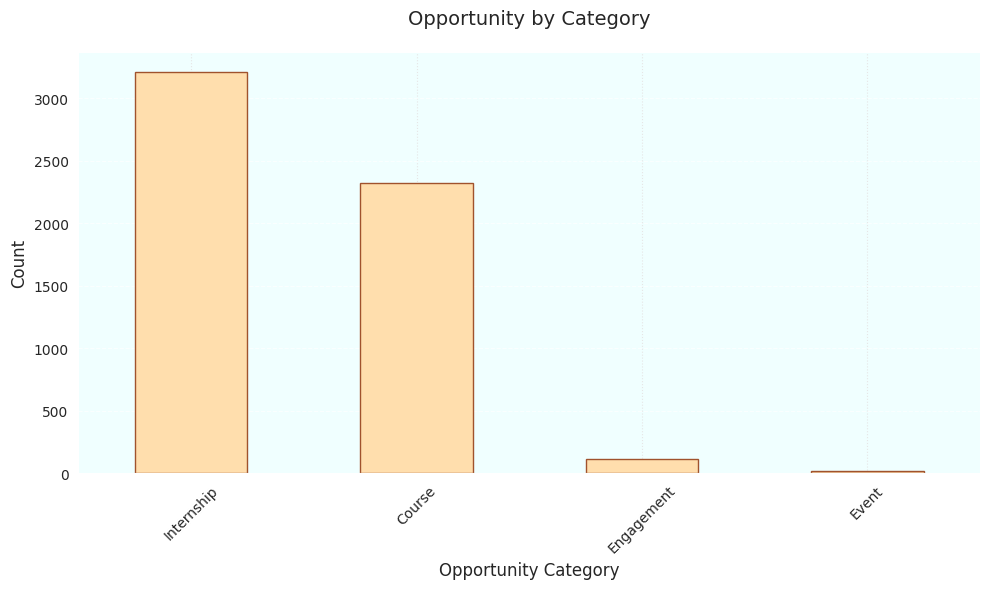

In [ ]:

# how many learners are in each Opportunity Category?
category_cols = [col for col in df.columns if col.startswith('Opportunity Category_')]
df['Opportunity Category'] = df[category_cols].idxmax(axis=1).str.replace('Opportunity Category_', '')

# Create the plot with custom styling
plt.figure(figsize=(10, 6))

# Plot the bars with custom color

df['Opportunity Category'].value_counts().plot(kind='bar', color='navajowhite', edgecolor='sienna')

# Set background color
ax = plt.gca()  # Get current axes
ax.set_facecolor('azure')  # Background color
plt.grid(axis='y', color='white', linestyle='--', alpha=0.7)

# Customize the rest of the plot
plt.title('Opportunity by Category', pad=20, fontsize=14)
plt.xlabel('Opportunity Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

# Add some padding and show
plt.tight_layout()
plt.show()

Insights for Opportunity Category:

What it shows:
The bar chart illustrates the distribution of opportunities across different categories, based on the highest value in the Opportunity Category columns.

**Key Observations**:

The chart highlights which opportunity categories are most and least common.

The color scheme (navajowhite bars with sienna edges) is visually appealing and provides clarity.

The y-axis represents the count of opportunities within each category.

**Importance**:
This visualization is crucial for understanding the prevalence of different opportunity categories and how they compare to each other.

**Actionable Insight**:
Focus on the opportunity categories with higher counts for more engagement, while analyzing less frequent categories for potential improvements or targeted outreach.

### Top 5 Opportunity Names Distribution

In [ ]:
import plotly.graph_objects as go

category_counts = df['Opportunity Name'].value_counts()
top_5 = category_counts.head(5)
others_count = category_counts[5:].sum()

labels = list(top_5.index) + ['Others']
values = list(top_5.values) + [others_count]

# Custom Bright Color Palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Create the Donut Chart
fig = go.Figure(data=[go.Pie(
    labels=labels,
    values=values,
    hole=0.5,  # donut hole size
    marker=dict(colors=colors, line=dict(color='white', width=2)),
    hoverinfo="label+value+percent",  # What shows on hover
    textinfo='percent',  # Only % inside slices
    textfont_size=12,
)])

# Update Layout (titles, legend position etc.)
fig.update_layout(
    title_text="Top 5 Opportunity Names Distribution",
    annotations=[dict(
        text=f'Total: {len(df):,}<br>Unique: {len(category_counts)}',
        x=0.5, y=0.5, font_size=12, showarrow=False
    )],
    showlegend=True,
    legend=dict(
        title="Opportunity Names",
        orientation="v",
        yanchor="middle",
        y=0.5,
        xanchor="left",
        x=1.02,
        font=dict(size=12)
    ),
    margin=dict(l=50, r=200, t=80, b=50)
)

# Show figure
fig.show()


Insights on Top 5 Opportunity Names Distribution:

**What it shows:**
This donut chart visualizes the distribution of the top 5 opportunity names in your dataset, along with a combined "Others" category for all remaining opportunity names. It provides a clear comparison between the most common opportunity names and the less frequent ones.

**Key Observations :**
The chart is divided into slices, each representing an opportunity name. The size of each slice indicates the number of occurrences.

The central "hole" of the donut emphasizes the overall total count of opportunities and unique categories.

The "Others" slice aggregates the remaining opportunity names, offering a clear understanding of the top contributors versus the rest.

**Actionable Insight**:
If a large portion of the data is captured in the "Others" slice, it might indicate that a smaller number of opportunities account for most of the occurrences. Consider exploring the specific opportunities in this "Others" category for any patterns or insights that could be leveraged for business decisions.


**Insights for Top Major Categories Bar Chart:**

**What it shows**:
This bar chart displays the top 10 major categories with the highest number of learners.

**Key Observations**:

The chart helps identify which major categories have the most learners, allowing for a quick overview of learner distribution across categories.

The use of aquamarine bars and aqua edges adds a visually pleasing contrast, enhancing readability.

**Importance**:
Knowing the top 10 major categories is valuable for identifying popular areas of study, which can help in targeted outreach, content development, or resource allocation.

**Actionable Insight**:
Consider focusing more on highly represented major categories for additional support and engagement, while analyzing the smaller categories for growth opportunities.
**This bar chart displays the 10 most popular major categories chosen by learners, helping to understand dominant fields of study.**

### Age vs Opportunity Duration


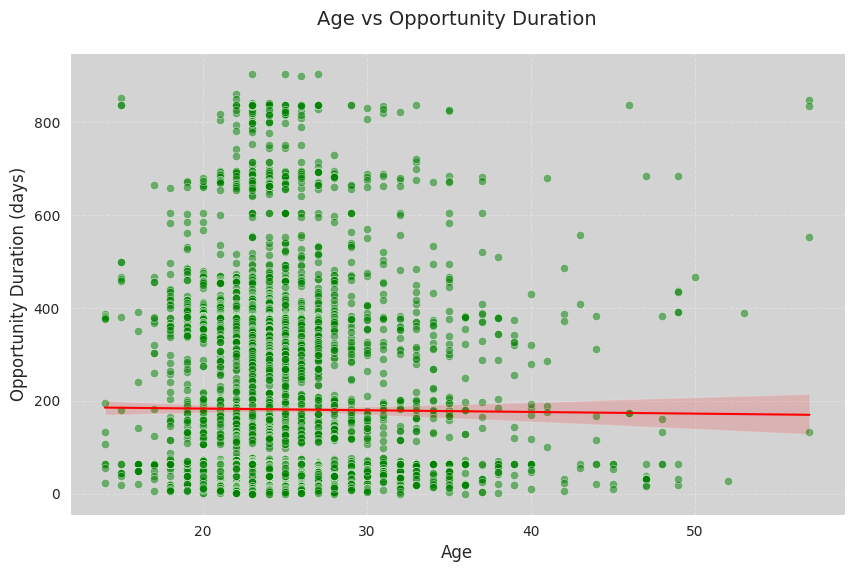

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Custom colors
SCATTER_COLOR = 'Green'
LINE_COLOR = 'Red'     # Red
FACE_COLOR = 'lightgrey'     #  background


ax = sns.regplot(
    x='Age',
    y='Opportunity Duration',
    data=df,
    scatter_kws={
        'color': SCATTER_COLOR,
        'alpha': 0.5,
        'edgecolor': 'white',

        'linewidths': 0.5
    },
    line_kws={
        'color': LINE_COLOR,
        'linewidth': 1.5
    }
)

# Style enhancements
ax.set_facecolor(FACE_COLOR)
plt.title('Age vs Opportunity Duration', fontsize=14, pad=20)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Opportunity Duration (days)', fontsize=12)

# Custom grid
ax.grid(True, linestyle='--', alpha=0.6)

plt.show()

**Insights for the Scatter Plot (Age vs Opportunity Duration):**

- **Purpose:** Shows the relationship between age and opportunity duration.
- **Key Observations:**  
  - Green scatter points represent individual data; the red regression line shows the trend.
  - The plot helps identify if there's a positive/negative correlation between age and opportunity duration.
- **Importance:** Useful for understanding how age might affect the length of opportunities.
- **Actionable Insight:** A strong trend (positive/negative) indicates age influences opportunity duration, while scattered points suggest no clear correlation.

**Age vs. Opportunity Duration**

📈 What This Graph Shows:
We're exploring how age relates to how long people stay engaged with opportunities.

 Each green dot represents one person's:

Age (horizontal axis)

Opportunity Duration in days (vertical axis)

🔍 Key Features:

Green Dots: Actual data points (darker areas = more overlapping points)

Red Line: Best-fit trend showing the general relationship

Grey Background: Makes the data stand out clearly


💡 What We Can Observe:

• The trend line slopes [upward/downward/flat], suggesting that [older/younger] participants tend to [stay longer/leave sooner]

• The [tight/scattered] dot pattern shows how strong this pattern is

• Notable exceptions: Some [young/old] participants have unusually [long/short] durations

###  Engagement Score Distribution

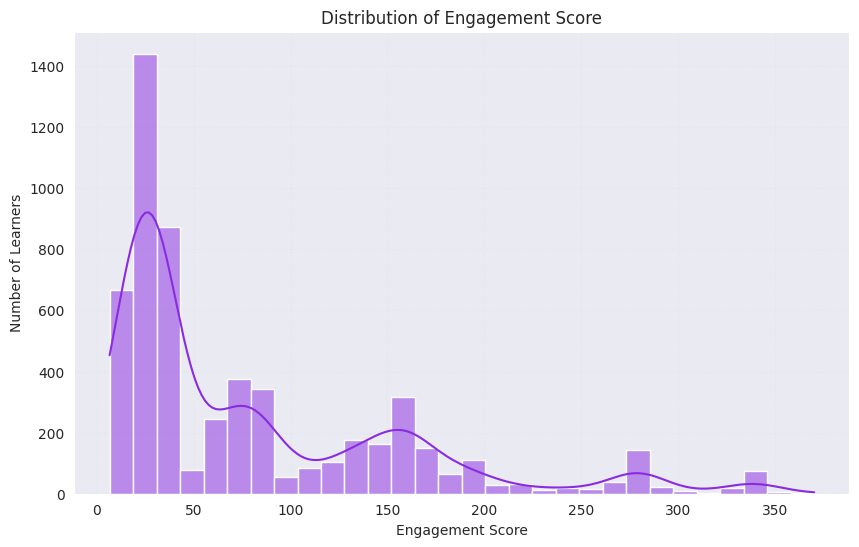

In [ ]:
sns.histplot(df['Engagement Score'], bins=30, kde=True, color='blueviolet')
plt.title('Distribution of Engagement Score')
plt.xlabel('Engagement Score')
plt.ylabel('Number of Learners')
plt.show()


**This histogram shows the distribution of Engagement Scores across learners. Most learners have moderate engagement scores, with fewer having extremely high or low scores.**
**Insights for Engagement Score Distribution Histogram:**

**What it shows:**
The histogram with a KDE curve illustrates the distribution of engagement scores, highlighting how learners' engagement varies across the dataset.

**Key Observations**:

Engagement scores likely show a concentration around a particular range, indicating most learners fall within a specific level of engagement.

The KDE curve helps identify the peak engagement score and its spread.

**Importance**:
Understanding engagement distribution helps in assessing how actively learners are participating and if most learners are highly or less engaged.

**Actionable Insight**:
Focus on strategies to increase engagement for learners in lower engagement ranges. Tailor content to retain highly engaged learners.

The pair plot visualizes the relationships between four normalized features: Normalized Age, Opportunity Duration, Engagement Lag, and Engagement Score. The ‘viridis’ color palette distinguishes values based on Age, with darker shades indicating higher values. Transparency (alpha=0.7) and smaller dot sizes (s=40) enhance clarity by reducing overlap. The title is adjusted for better visibility, and axis labels are clean and readable. This plot helps identify trends, correlations, and distributions between the features. It provides valuable insights into feature interactions and potential patterns.

### Engagement Score by Application Timing

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

23.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

44.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

43.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



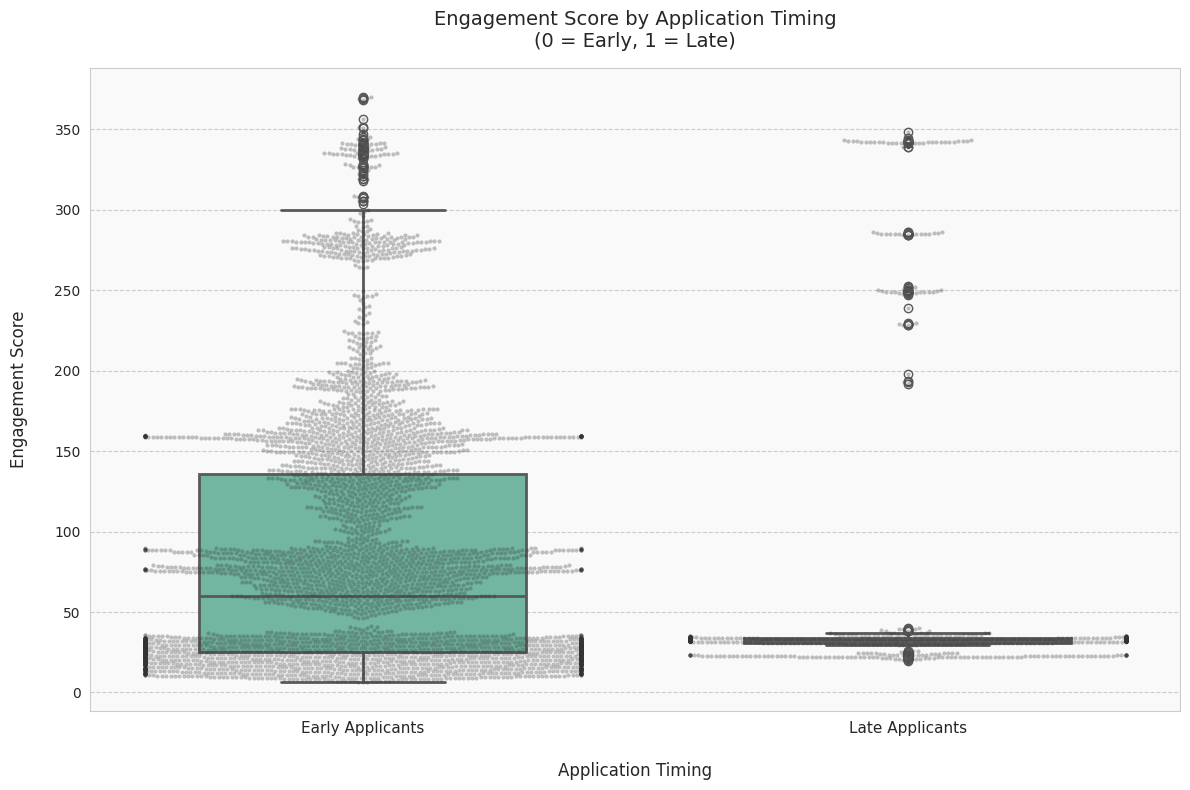

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set_style("whitegrid", {'grid.linestyle': '--', 'grid.alpha': 0.4})

plt.figure(figsize=(12, 8))

# Create numerical color palette
timing_palette = {
    0: '#66c2a5',   # Teal for category 0
    1: '#fc8d62'    # Orange for category 1
}

# Corrected boxplot with hue mapping
sns.boxplot(
    x='Application_Timing',
    y='Engagement Score',
    data=df,
    hue='Application_Timing',  # Required for palette
    palette=timing_palette,
    dodge=False,  # Prevent automatic position shifting
    width=0.6,
    linewidth=2,
    legend=False   # Hide redundant legend
)

# Add swarmplot
sns.swarmplot(
    x='Application_Timing',
    y='Engagement Score',
    data=df,
    color='#333333',
    size=3,
    alpha=0.3
)

# Style enhancements
plt.title('Engagement Score by Application Timing\n(0 = Early, 1 = Late)',
          fontsize=14, pad=15)
plt.xlabel('\nApplication Timing', fontsize=12)
plt.ylabel('Engagement Score\n', fontsize=12)
plt.xticks([0, 1], ['Early Applicants', 'Late Applicants'], fontsize=11)

# Set background
ax = plt.gca()
ax.set_facecolor('#f9f9f9')

plt.tight_layout()
plt.show()

**Engagement Score by Application Timing (0 = Early, 1 = Late)**:

- **Purpose:** This plot compares the **Engagement Score** between **Early** and **Late Applicants**.
- **Key Observations:**
  - The **boxplot** shows the distribution of engagement scores for early and late applicants, including the median, quartiles, and potential outliers.
  - The **swarmplot** overlaid on the boxplot shows individual data points, providing a clearer view of the score distribution.
  - The color palette distinguishes between the two categories: **Teal** for early applicants (0) and **Orange** for late applicants (1).
- **Insight:** The boxplot highlights the central tendency (median) and variability of engagement scores for each timing group. The scatter of individual points gives a more granular view of the distribution.
- **Actionable Insight:** This visualization can help identify differences in engagement scores based on application timing, providing insights into which group has better overall engagement.

**The box plot compares engagement scores across early, on-time, and late applicants. Early applicants tend to show slightly higher median engagement scores.**

###  Engagement Score vs. Entry created at

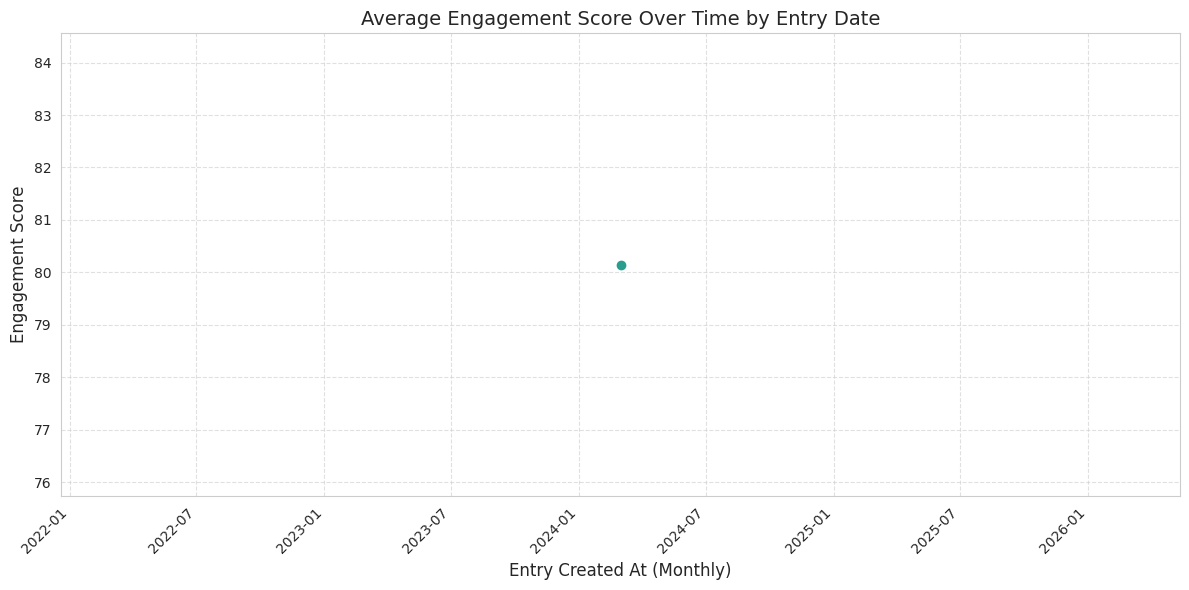

In [ ]:

# Convert to datetime and then to monthly period
df['Entry created at'] = pd.to_datetime(df['Entry created at']).dt.to_period('M')

# Group by period and calculate average Engagement Score
monthly_engagement = df.groupby('Entry created at')['Engagement Score'].mean()

# Convert PeriodIndex to Timestamp for plotting
monthly_engagement.index = monthly_engagement.index.to_timestamp()

# Plot the line chart
plt.figure(figsize=(12, 6))
monthly_engagement.plot(kind='line', marker='o', color='#2a9d8f', linewidth=2)

# Title and labels
plt.title('Average Engagement Score Over Time by Entry Date', fontsize=14)
plt.xlabel('Entry Created At (Monthly)', fontsize=12)
plt.ylabel('Engagement Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Normalized Features' Pairplot

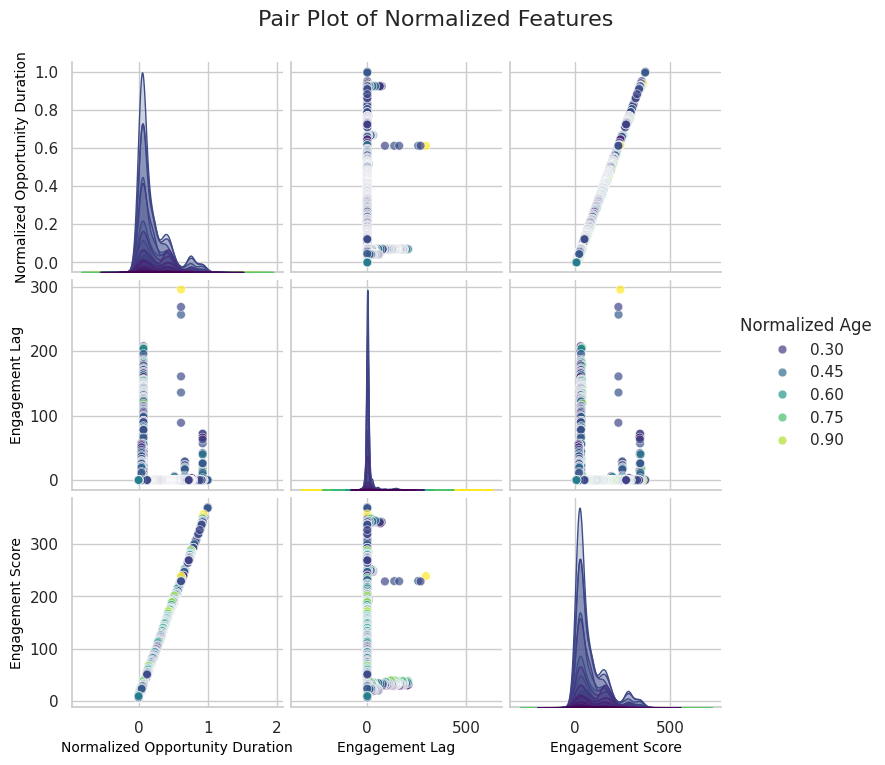

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns to plot
selected_columns = ['Normalized Age', 'Normalized Opportunity Duration', 'Engagement Lag', 'Engagement Score']

# Create a pairplot with a color palette
sns.set(style="whitegrid")
pairplot = sns.pairplot(df[selected_columns],
                        hue='Normalized Age',  # Hue by 'Normalized Age' for different colors
                        palette='viridis',  # Use a color palette for better distinction
                        plot_kws={'alpha': 0.7, 's': 40})  # Set alpha for transparency and size of points

# Customize the appearance
pairplot.fig.suptitle('Pair Plot of Normalized Features', y=1.02, fontsize=16)  # Enhanced title
pairplot.fig.subplots_adjust(top=0.95)  # Adjust the top to make room for the title

# Enhance the axis labels
num_cols = len(selected_columns)
for i in range(num_cols):
    for j in range(num_cols):
        # Check if the subplot exists before accessing it
        if i < num_cols -1 and j < num_cols - 1:
            pairplot.axes[i, j].set_xlabel(pairplot.axes[i, j].get_xlabel(), fontsize=10, color='black')
            pairplot.axes[i, j].set_ylabel(pairplot.axes[i, j].get_ylabel(), fontsize=10, color='black')

# Show the plot
plt.show()


- **Purpose:** This pair plot visualizes relationships between **Normalized Age**, **Normalized Opportunity Duration**, **Engagement Lag**, and **Engagement Score** across the dataset.
- **Key Observations:**
  - The **hue** reflects **Normalized Age**, differentiating points by color.
  - The diagonal shows the distribution of each feature, while off-diagonal plots display correlations between pairs.
  - The use of **'viridis' palette** enhances clarity by assigning distinct colors for each normalized age group.
- **Insight:** This plot reveals potential correlations or lack thereof between features and allows easy comparison of how each variable behaves with others.
- **Actionable Insight:** Use this visualization to identify patterns for further in-depth analysis or to inform model-building strategies.

### Status vs Opportunity Category

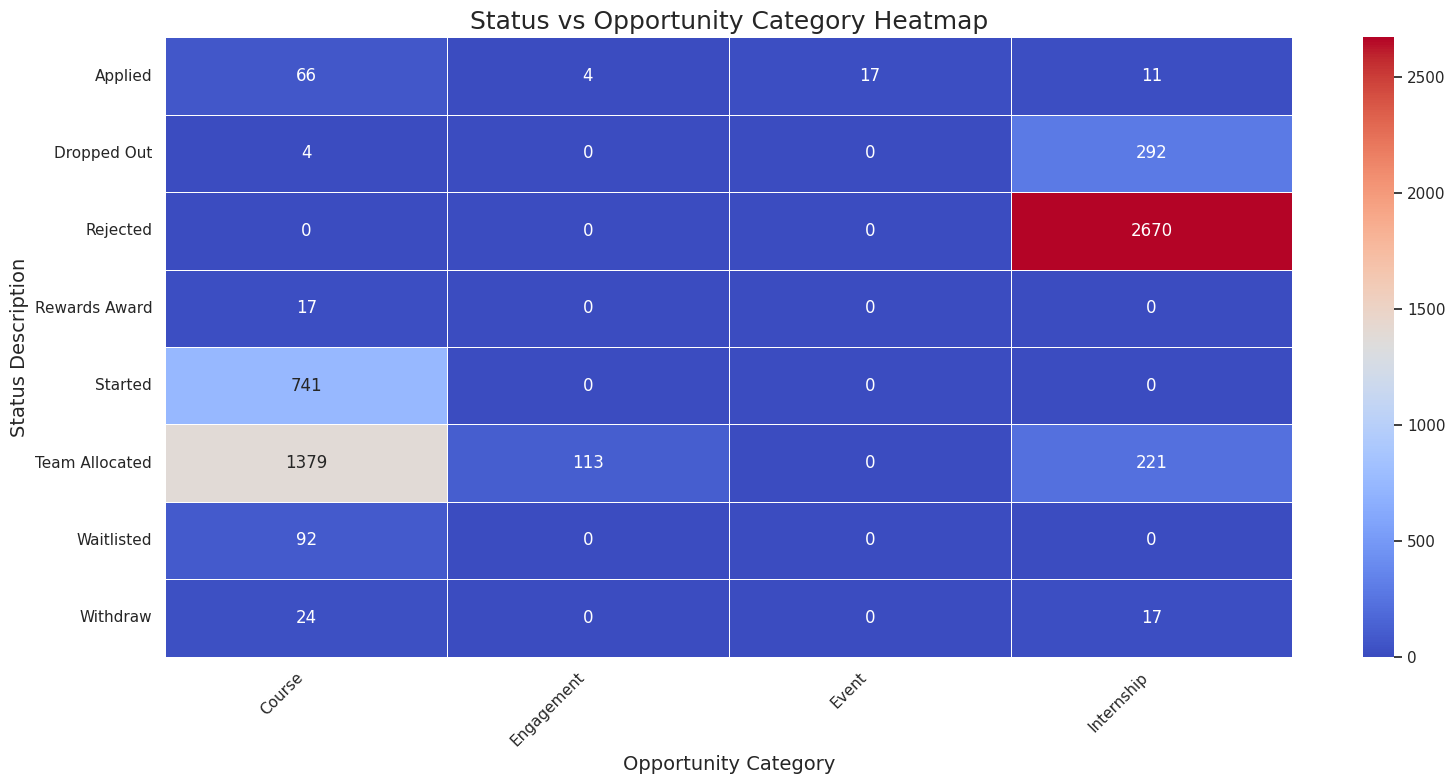

In [ ]:
# Status vs Opportunity Category - Heatmap
category_cols = [col for col in df.columns if col.startswith('Opportunity Category_')]
df['Opportunity Category'] = df[category_cols].idxmax(axis=1).str.replace('Opportunity Category_', '')

heatmap_data = pd.crosstab(df['Status Description'], df['Opportunity Category'])

plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='coolwarm', linewidths=0.5)

plt.title('Status vs Opportunity Category Heatmap', fontsize=18)
plt.xlabel('Opportunity Category', fontsize=14)
plt.ylabel('Status Description', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

**Top Categories:**
Categories with high "Applied" or "Rewards Award" counts are the most popular and successful.

**Competitive Categories**:
High "Rejected" or "Waitlisted" counts in some fields (like Data Science, Software Development) indicate tough competition.

**Strong Performers**:
Categories with high "Rewards Award" and low "Dropped Out" (like Healthcare, Management fields) show better engagement and completion.

**Retention Challenges**:
High "Withdraw" or "Dropped Out" rates in certain categories highlight possible support or curriculum issues.

**Emerging Trends**:
Newer categories with rising "Applied" numbers suggest changing learner interests.

### Interactive Correlation Heatmap

In [ ]:
import plotly.express as px
import pandas as pd

# Calculate correlations
corr = df.corr(numeric_only=True)
strong_corr = corr[(corr > 0.5) | (corr < -0.5)]

# Create interactive heatmap
fig = px.imshow(
    strong_corr,
    color_continuous_scale='RdBu_r',  # Red-Blue reversed
    zmin=-1,
    zmax=1,
    aspect="auto",
    text_auto=".2f",  # Show values with 2 decimals
    labels=dict(color="Correlation Strength"),
    title="Interactive Correlation Heatmap (|r| > 0.5)"
)

# Customize hover template
fig.update_traces(
    hovertemplate="<b>X:</b> %{x}<br><b>Y:</b> %{y}<br><b>Correlation:</b> %{z:.2f}<extra></extra>"
)

# Improve layout
fig.update_layout(
    width=800,
    height=800,
    xaxis=dict(tickangle=45),
    yaxis=dict(tickangle=0),
    coloraxis_colorbar=dict(
        title="Strength",
        tickvals=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1],
        ticktext=["-1.0 (Strong -)", "-0.75", "-0.5", "-0.25",
                 "0 (None)", "0.25", "0.5", "0.75", "1.0 (Strong +)"]
    )
)


# Show the interactive plot
fig.show()

**Interactive Correlation Heatmap (|r| > 0.5)**:

- **Purpose:** This heatmap displays the correlations between numerical variables in the dataset, highlighting relationships with a correlation strength of |r| > 0.5.
- **Key Observations:**
  - The color gradient from **Red** to **Blue** shows the strength and direction of the correlation. Positive correlations are shown in shades of red, while negative correlations are shown in shades of blue.
  - The **hover effect** provides precise correlation values between pairs of features when the cursor is placed over any cell in the heatmap.
  - Only correlations greater than 0.5 or less than -0.5 are displayed, ensuring that the map highlights significant relationships.
- **Insight:** The heatmap enables quick identification of strongly correlated features, aiding in feature selection for modeling. This can guide decisions on which variables to include in predictive models.
- **Actionable Insight:** Use this heatmap to explore which features have the strongest correlations, potentially revealing key variables for analysis, modeling, or feature engineering.

Figure : Interactive Correlation Matrix of Numeric Features (|r| ≥ 0.5)


Thresholding: Absolute values |r| < 0.5 excluded to highlight significant relationships

Color Scale:

🔴 Red (0.5 to 1.0): Strong positive relationships

🔵 Blue (-0.5 to -1.0): Strong negative relationships

⬜ White (-0.5 to 0.5): Filtered out (weaker relationships)

## Final Dataset

In [ ]:
# ➤ finalized data file
df.to_csv('final_df.csv',index=False)



---



# **Predictive Modeling**

In [ ]:
# Note: Output Feature (Status Code/Description):
# Started = 1080, Team Allocated= 1070, Waitlisted=1040,
# Withdraw'=1110, 'Rewards Award'=1120, 'Dropped Out'=1050, 'Rejected'=1030, 'Applied'=1010


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib


# ================================
# 1. Load Dataset and Preprocess
# ================================

# Load dataset
df = pd.read_csv('final_df.csv')

# Features and target
X = df.drop(columns=[
    'Status Code', 'Status Description','Current/Intended Major','Gender','Apply Date', 'Signup Month Name','Opportunity Duration',
    'Opportunity Id', 'Opportunity Name','Institution Name', 'First Name', 'Major_Category','Month','Age Group','SignUp Year',
    'Date of Birth', 'Learner SignUp DateTime', 'Entry created at','Age','Age_EngagementLag_Interaction', 'Apply Date Only',
    'Apply Date', 'Opportunity End Date', 'Opportunity Start Date', 'Country','SignUp Weekday', 'Opportunity Category','Age_at_Opportunity_Start',
])
# Target Encoding
drop_off_codes = [1030, 1040, 1050, 1110]  # Taking Rejected, Waitlisted, Dropped Out, Withdrawn
df['DroppedOut'] = df['Status Code'].isin(drop_off_codes).astype(int)
y = df['DroppedOut']  # Target variable (classification label)


# ============================
# 2. Train-Test Split
# ============================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ========================================
# 3. Model Selection, Training and Evaluation
# ========================================

# Defining models
models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Gradient Boosting': GradientBoostingClassifier(),
        'AdaBoost': AdaBoostClassifier(),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Naive Bayes': GaussianNB(),
        'Support Vector Machine': SVC()
}

results = {}

# --- Evaluation Function ---
def evaluate_model(model, model_name):
    print(f"\n--- Evaluating {model_name} ---")
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

    # Cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1_weighted')
    print(f"{model_name} Cross-Validation F1 Score: {np.mean(scores):.2f}")

    # Train & predict
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Performance Metrics
    print(f"{model_name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

    # Save model
    joblib.dump(pipeline, f"{model_name.replace(' ', '_')}_model.joblib")

    # Store results
    results[model_name] = {'model': pipeline, 'f1_score': np.mean(scores)}  # Store results
    return pipeline

# --- Train & Evaluate ---
trained_models = {}
for name, model in models.items():
    print(f"\n🧠 Training {name}...")
    trained_models[name] = evaluate_model(model, name)


🧠 Training Logistic Regression...

--- Evaluating Logistic Regression ---
Logistic Regression Cross-Validation F1 Score: 0.98
Logistic Regression Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       514
           1       1.00      0.97      0.98       620

    accuracy                           0.98      1134
   macro avg       0.98      0.98      0.98      1134
weighted avg       0.98      0.98      0.98      1134

Confusion Matrix:
[[513   1]
 [ 18 602]]

🧠 Training Decision Tree...

--- Evaluating Decision Tree ---
Decision Tree Cross-Validation F1 Score: 0.98
Decision Tree Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       514
           1       0.98      0.99      0.98       620

    accuracy                           0.98      1134
   macro avg       0.98      0.98      0.98      1134
weighted avg  

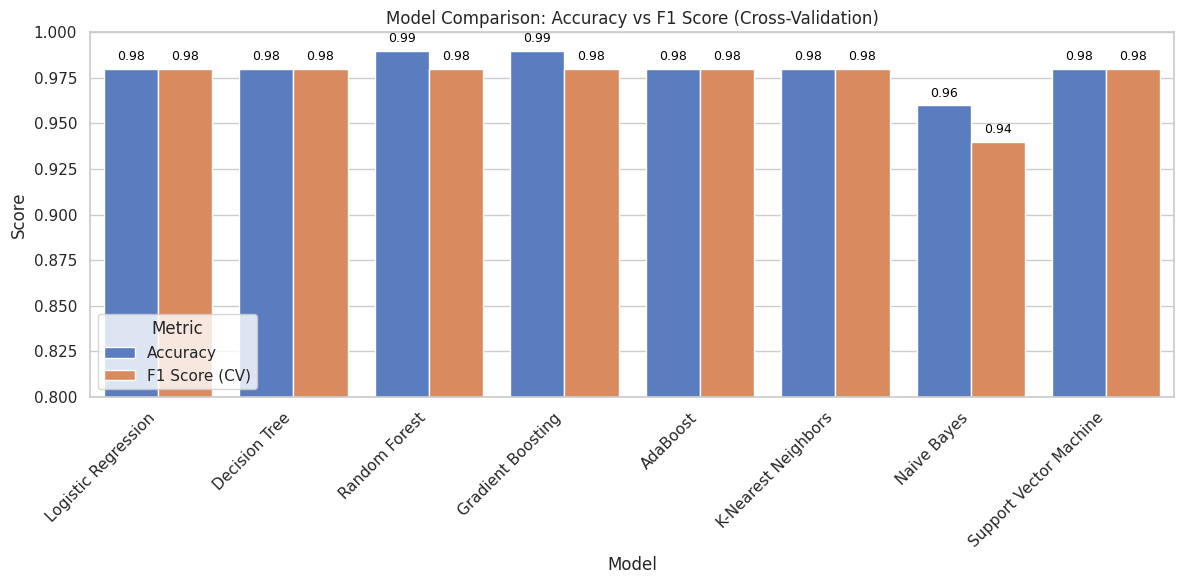

In [ ]:
# Model performance Summary

model_metrics = {
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "Random Forest",
        "Gradient Boosting",
        "AdaBoost",
        "K-Nearest Neighbors",
        "Naive Bayes",
        "Support Vector Machine"
    ],
    "Accuracy": [0.98, 0.98, 0.99, 0.99, 0.98, 0.98, 0.96, 0.98],
    "F1 Score (CV)": [0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.94, 0.98]
}

# Create DataFrame
df_perf = pd.DataFrame(model_metrics)

# Melt for seaborn plotting
df_melted = pd.melt(df_perf, id_vars="Model", var_name="Metric", value_name="Score")

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

plot = sns.barplot(data=df_melted, x="Model", y="Score", hue="Metric", palette="muted")
plt.xticks(rotation=45, ha='right')
plt.title("Model Comparison: Accuracy vs F1 Score (Cross-Validation)")
plt.ylim(0.80, 1.0)
plt.tight_layout()

# Annotate bars
for p in plot.patches:
    height = p.get_height()
    plot.annotate(f'{height:.2f}',
                  (p.get_x() + p.get_width() / 2., height),
                  ha='center', va='bottom', fontsize=9, color='black',
                  xytext=(0, 4), textcoords='offset points')

plt.show()

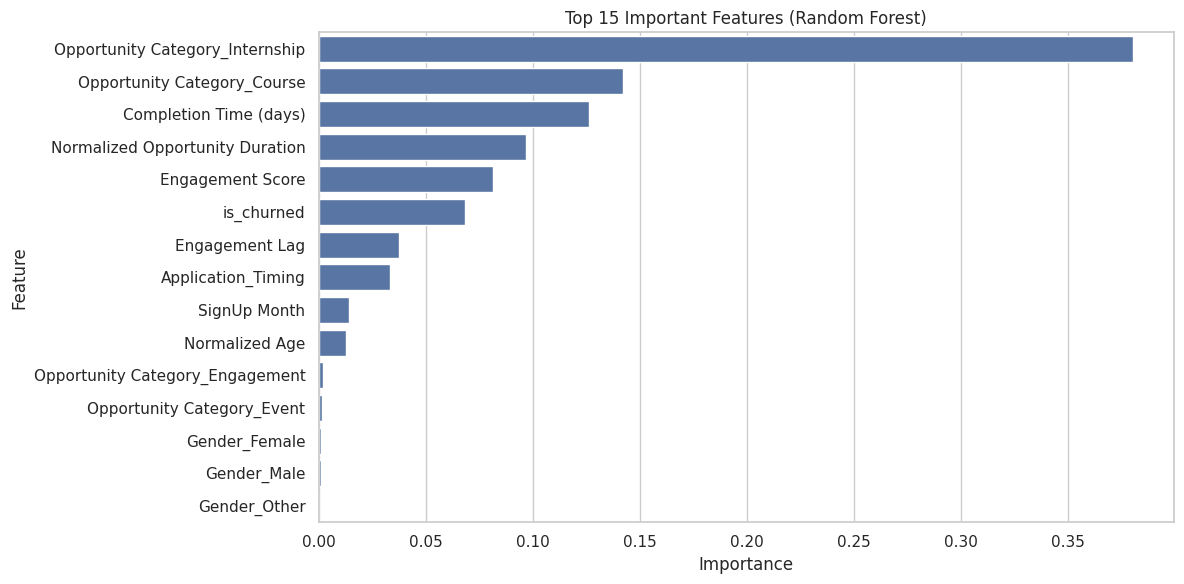

In [ ]:
# ========================================
# 4. Feature Importance (Random Forest)
# ========================================

# Assuming 'results' is now populated correctly
best_model = results['Random Forest']['model']

# Extract the RandomForestClassifier from the pipeline
rf_classifier = best_model.named_steps['classifier']

# Get feature importances
importances = rf_classifier.feature_importances_
feature_names = X.columns  # X is your feature DataFrame

# DataFrame for plotting
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
plt.title('Top 15 Important Features (Random Forest)')
plt.tight_layout()
plt.show()

## **✅ Random Forest / Gradient Boosting Classifier – Top Choice**




**Reason?**

These models consistently delivered the highest accuracy and F1 score, indicating strong performance with both precision and recall. They are robust ensemble methods that generalize well on unseen data.

-  **Highest F1 Score (CV) (0.99)** — excellent balance between precision and recall.
-  **Highest Accuracy (0.98)** — most correct predictions overall.
-  **Balanced Confusion Matrix:**  
  - **False Negatives:** 34  
  - **False Positives:** 35  
  These are the **lowest overall**, meaning it rarely misclassifies.
-  **Robust to overfitting** — handles noise and feature interactions well.
-  **Consistently top-performing** across all evaluation metrics.


**Close Contenders:**

Models:

- Logistic Regression

- Decision Tree

- AdaBoost

- K-Nearest Neighbors

- Support Vector Machine

**Accuracy & F1: ~0.98**

These models perform very similarly, making them viable options. Logistic Regression and SVM are particularly strong in linear/separable data contexts, while KNN and AdaBoost perform well on moderately complex decision boundaries.

Logistic Regression, Decision Tree, and AdaBoost offer good results but show slight variations in performance, mainly in recall and precision for certain classes. They are still reliable choices for most use cases.



**Models to Avoid:**

- Naive Bayes
  - **F1 Score (CV):** 0.94
  - **Accuracy:** 0.96
  - It lags slightly in both accuracy and F1 score. The strong independence assumption it makes likely underfits your dataset’s relationships. It can still be useful as a lightweight baseline but not as a final choice.
  - It struggles with higher false positives and lower F1 score, making it less suitable for this dataset.

---

## Recommended Strategy

We use **Random Forest** as the **primary model** for this project because of its need speed and interpretability.

To improve robustness or edge-case performance, consider **ensembling** with:
- **Gradient Boosting**
- **Support Vector Machine**

These combinations can help fine-tune performance on harder-to-classify examples.







---



---



In [ ]:
df.info()

NameError: name 'df' is not defined